Hier werden die Daten aus Yahoo Finance heruntergeladen, bearbeitet und abschließend beschrieben. Die Transformationen der Daten haben aus Gründen der Verifizierbarkeit und Sichtbarkeit parallel auch in Microsoft Excel über Funktionen und VBA stattgefunden - das Ergebnis ist identisch.

## Importe

In [1]:
#Import der notwendigen Bibliotheken, Installation mit pip bereits erfolgt

import yfinance as yf
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import csv

## Herunterladen der Daten

### S&P 500

Online wurde eine Übersicht der Ticker mit Start- und Endzeitpunkt für die Zugehörigkeit zum S&P 500. Diese Liste wird hier eingelesen, um daraus die Tageskurse für die entsprechenden Ticker auszulesen.

In [2]:
#Einlesen der Ticker für alle historischen S&P500-Unternehmen

sp500_ticker_list = []

#Auslesen der historischen S&P500 Ticker, Übertrag in Liste
with open("sp500_ticker.csv", "r") as csvfile:
    sp500_ticker_datei = csv.reader(csvfile, delimiter=',')
    for row in sp500_ticker_datei:
        sp500_ticker_list.append(row[0])
        
#Löschen der Spaltenüberschrift
del sp500_ticker_list[0]

#Print
print(len(sp500_ticker_list))
print(sp500_ticker_list)

1175
['A', 'AABA', 'AAL', 'AAMRQ', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABI', 'ABKFQ', 'ABMD', 'ABNB', 'ABS', 'ABT', 'ABX', 'ACAS', 'ACGL', 'ACKH', 'ACN', 'ACS', 'ACV', 'ADBE', 'ADCT', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'ADT', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AFS.A', 'AGC', 'AGN', 'AHM', 'AIG', 'AIT', 'AIV', 'AIZ', 'AJG', 'AKAM', 'AKS', 'AL', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALTR', 'ALXN', 'AM', 'AMAT', 'AMCC', 'AMCR', 'AMD', 'AME', 'AMG', 'AMGN', 'AMH', 'AMP', 'AMT', 'AMTM', 'AMZN', 'AN', 'ANDV', 'ANDW', 'ANET', 'ANF', 'ANRZQ', 'ANSS', 'ANTM', 'ANV', 'AON', 'AOS', 'APA', 'APC', 'APCC', 'APD', 'APH', 'APO', 'APOL', 'APTV', 'AR', 'ARC', 'ARE', 'ARG', 'ARNC', 'AS', 'ASC', 'ASH', 'ASN', 'ASND', 'ASO', 'AT', 'ATGE', 'ATI', 'ATO', 'ATVI', 'AV', 'AVB', 'AVGO', 'AVP', 'AVY', 'AW', 'AWE', 'AWK', 'AXON', 'AXP', 'AYE', 'AYI', 'AZA.A', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BAY', 'BBBY', 'BBI', 'BBT', 'BBWI', 'BBY', 'BC', 'BCO', 'BCR', 'BDK', 'BDX', 'BEAM', 'BEN', 'BEV', 'BF.B', 'BFI', 'BFO', 'BG

In [3]:
#Abruf der Daten für den gesamten Zeitraum aus Yahoo Finance über die zuvor eingelesenen Ticker
#start_date = "2005-06-01"
#end_date = "2025-05-31"

#stock = yf.download(sp500_ticker_list, start=start_date, end=end_date, auto_adjust=False)
#df_SP500 = stock['Close']

In [4]:
df_SP500 = pd.read_csv(
    "SP500_Gesamt_Close(2).csv",
    sep=",",                 # oder ";" falls nötig
    decimal=".",
    parse_dates=[0],         # erste Spalte als Datum parsen
    dayfirst=True,           # wichtig für deutsches Datumsformat
    index_col=0              # erste Spalte als Index setzen
)

In [5]:
df_SP500.info

<bound method DataFrame.info of                      A  AABA    AAL  AAMRQ        AAP        AAPL        ABBV  \
Date                                                                            
2005-06-01   17.296137   NaN    NaN    NaN  40.119999    1.439286         NaN   
2005-06-02   17.303289   NaN    NaN    NaN  40.673332    1.430000         NaN   
2005-06-03   17.210300   NaN    NaN    NaN  40.660000    1.365714         NaN   
2005-06-06   17.539343   NaN    NaN    NaN  41.293331    1.354286         NaN   
2005-06-07   17.324751   NaN    NaN    NaN  41.733334    1.305000         NaN   
...                ...   ...    ...    ...        ...         ...         ...   
2025-05-23  108.529999   NaN  11.19    NaN  48.669998  195.270004  183.259995   
2025-05-27  111.260002   NaN  11.64    NaN  49.599998  200.210007  185.720001   
2025-05-28  110.879997   NaN  11.43    NaN  52.709999  200.419998  183.089996   
2025-05-29  113.279999   NaN  11.40    NaN  48.360001  199.949997  185.619995

In [6]:
#AUSKOMMENTIERT WEGEN LAUFZEIT
#Zusätzlich zu den Preisdaten: Abruf von Ticker-Infos für die S&P500-Unternehmen wie Name, Währung oder Sektor

#sptickerInfos = []

#for ticker in sp500_ticker_list:
#    tsp = yf.Ticker(ticker)
#    infosp = tsp.info
#    sptickerInfos.append({
#        "Ticker": ticker,
#        "Name": infosp.get("longName", "N/A"),
#        "Währung": infosp.get("currency", "N/A"),
#        "Börse": infosp.get("exchange", "N/A"),
#        "Sektor": infosp.get("sector", "N/A"),
#        "Branche": infosp.get("industry", "N/A")
#    })

#sptickerInfos_df = pd.DataFrame(sptickerInfos)

In [7]:
#sptickerInfos_df.info

In [8]:
#sptickerInfos_df.to_csv("infos_zu_tickern.csv")

#### JSE

Online wurden aus aus verschiedenen Quellen Ticker für die südafrikansiche Börse zusammengetragen. Bei nicht übereinstimmenden Tickern wurden die Ticker händisch über Google-Suche überprüft, ob diese zur JSE zugehörig waren. Die finale Ticker-Liste wird nachfolgend eingelesen.

In [9]:
#Abruf Ticker für die JSE-Unternehmen

JSE_ticker_list = []

#Auslesen der historischen JSE Ticker, Übertrag in Liste
with open("JSE-Ticker.csv", "r") as csvfile:
    JSE_ticker_datei = csv.reader(csvfile, delimiter=';')
    for row in JSE_ticker_datei:
        JSE_ticker_list.append(row[12])
        
#Löschen der Spaltenüberschrift
del JSE_ticker_list[0]

#Print
print(len(JSE_ticker_list))
print(JSE_ticker_list)

384
['4SI.JO', 'ABG.JO', 'APF.JO', 'ACS.JO', 'AIP.JO', 'ADR.JO', 'ADH.JO', 'AFE.JO', 'AON.JO', 'AOO.JO', 'ADW.JO', 'AME.JO', 'ARI.JO', 'AFT.JO', 'ACT.JO', 'AHL.JO', 'AFH.JO', 'AEL.JO', 'APH.JO', 'AGL.JO', 'ANG.JO', 'ANH.JO', 'ACL.JO', 'ART.JO', 'AHA.JO', 'AHB.JO', 'ASC.JO', 'APN.JO', 'ARA.JO', 'ARL.JO', 'ATT.JO', 'AEG.JO', 'AVI.JO', 'AYO.JO', 'BWN.JO', 'BAW.JO', 'BEL.JO', 'BHG.JO', 'BID.JO', 'BVT.JO', 'BLU.JO', 'BCF.JO', 'BOX.JO', 'BAT.JO', 'BIK.JO', 'BRN.JO', 'BRT.JO', 'BTI.JO', 'BYI.JO', 'CAA.JO', 'CAC.JO', 'CGR.JO', 'CCO.JO', 'CTA.JO', 'CPI.JO', 'CSB.JO', 'CVW.JO', 'CAT.JO', 'CHP.JO', 'CMO.JO', 'CLH.JO', 'CLS.JO', 'CLI.JO', 'CMH.JO', 'CFR.JO', 'CND.JO', 'CML.JO', 'CKS.JO', 'COH.JO', 'DTC.JO', 'DLT.JO', 'DNB.JO', 'DKR.JO', 'DIB.JO', 'DCP.JO', 'DSY.JO', 'DRD.JO', 'EMN.JO', 'EMH.JO', 'EPS.JO', 'EEL.JO', 'ELI.JO', 'EMI.JO', 'ENX.JO', 'EOH.JO', 'EPE.JO', 'EQU.JO', 'EUZ.JO', 'EXP.JO', 'EXX.JO', 'FBR.JO', 'FGL.JO', 'FSR.JO', 'FFB.JO', 'GAI.JO', 'GML.JO', 'GLN.JO', 'GTC.JO', 'GLI.JO', 'GFI.

In [10]:
#Abruf der Daten für den gesamten Zeitraum aus Yahoo Finance über die zuvor eingelesenen Ticker
#start_date = "2005-06-01"
#end_date = "2025-05-31"

#stock = yf.download(JSE_ticker_list, start=start_date, end=end_date, auto_adjust=False)
#df_JSE = stock['Close']

In [11]:
df_JSE = pd.read_csv(
    "Datenabruf_Grundlage_JSE.csv",
    sep=",",                
    decimal=".",
    parse_dates=[0],      
    dayfirst=True,  
    index_col=0      
)

In [12]:
df_JSE.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACS.JO  ACT.JO       ADH.JO  ADI.JO  \
Date                                                                       
2005-06-01     NaN   8240.0  4980.0     NaN   130.0   133.701508     NaN   
2005-06-02     NaN   8250.0  4949.0     NaN   130.0   131.749695     NaN   
2005-06-03     NaN   8261.0  4949.0     NaN   130.0   131.749695     NaN   
2005-06-06     NaN   8290.0  5023.0     NaN   130.0   132.725601     NaN   
2005-06-07     NaN   8345.0  4845.0     NaN   149.0   131.749695     NaN   
...            ...      ...     ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   700.0   160.0  3199.000000     NaN   
2025-05-27    70.0  16848.0   105.0   750.0   160.0  3210.000000     NaN   
2025-05-28    73.0  17300.0   101.0   720.0   174.0  3283.000000     NaN   
2025-05-29    70.0  17579.0   106.0   850.0   166.0  3247.000000     NaN   
2025-05-30    70.0  17332.0   116.0   850.0   160.0  321

In [13]:
#df_JSE.to_csv("Datenabruf_Grundlage_JSE.csv")

In [14]:
#Auskommentiert wegen Laufzeit
#Abruf Ticker-Infos für die JSE-Unternehmen

#tickerInfos_JSE = []

#for ticker_JSE in JSE_ticker_list:
 #   t_JSE = yf.Ticker(ticker)
 #   info_JSE = t_JSE.info
 #   tickerInfos_JSE.append({
 #       "Ticker": ticker,
  #      "Name": info_JSE.get("longName", "N/A"),
  #      "Währung": info_JSE.get("currency", "N/A"),
 #       "Börse": info_JSE.get("exchange", "N/A"),
 #       "Sektor": info_JSE.get("sector", "N/A"),
 #       "Branche": info_JSE.get("industry", "N/A")
 #   })

#tickerInfos_df_JSE = pd.DataFrame(tickerInfos_JSE)

#tickerInfos_df_JSE.info

## Bearbeiten der Daten S&P500

In [15]:
#Wie viele Ticker haben für den Betrachtungszeitraum keine Kurse aus YF bekommen?

anzahl_nan_spalten = df_SP500.isna().all().sum()
print(f"Anzahl Spalten nur mit NaN: {anzahl_nan_spalten}")

Anzahl Spalten nur mit NaN: 332


In [16]:
#Entfernen der Spalten, die ausschließlich NaN-Werte enthalten
df_SP500 = df_SP500.dropna(axis=1, how="all")

anzahl_nan_spalten = df_SP500.isna().all().sum()
print(f"Anzahl Spalten nur mit NaN: {anzahl_nan_spalten}")

anzahl_spalten = df_SP500.shape[1]
print(f"Anzahl Spalten: {anzahl_spalten}")

Anzahl Spalten nur mit NaN: 0
Anzahl Spalten: 843


In [17]:
#Interpolieren von fehlenden Werten (maximal 5 zwischen vorhandenen Tageskursen)
def interpolation(df: pd.DataFrame) -> pd.DataFrame:
    
    df_out = df.copy()

    for col in df_out.columns:
        spalte = df_out[col]

        #Vorne: falls erste Zelle NaN, mit dem nächsten Wert füllen
        if pd.isna(spalte.iloc[0]) and not pd.isna(spalte.iloc[1]):
            spalte.iloc[0] = spalte.iloc[1]

        #Suche NaN-Gruppen
        ist_nan = spalte.isna()
        if not ist_nan.any():
            continue

        gruppen = []
        i = 0
        while i < len(spalte):
            if ist_nan.iloc[i]:
                start = i
                while i < len(spalte) and ist_nan.iloc[i]:
                    i += 1
                ende = i - 1
                gruppen.append((start, ende))
            i += 1

        #Interpolation für NaN-Blöcke mit <= 5 Lücken
        for start, ende in gruppen:
            laenge = ende - start + 1
            if laenge <= 5:
                links = start - 1
                rechts = ende + 1
                if links >= 0 and rechts < len(spalte) and not pd.isna(spalte.iloc[links]) and not pd.isna(spalte.iloc[rechts]):
                    #Linear interpolieren
                    step = (spalte.iloc[rechts] - spalte.iloc[links]) / (laenge + 1)
                    for k in range(laenge):
                        spalte.iloc[start + k] = spalte.iloc[links] + step * (k + 1)

        df_out[col] = spalte

    return df_out

In [18]:
df_SP500_mit_Interpolation = interpolation(df_SP500)
df_SP500_mit_Interpolation.info

<bound method DataFrame.info of                      A    AAL        AAP        AAPL        ABBV        ABNB  \
Date                                                                           
2005-06-01   17.296137    NaN  40.119999    1.439286         NaN         NaN   
2005-06-02   17.303289    NaN  40.673332    1.430000         NaN         NaN   
2005-06-03   17.210300    NaN  40.660000    1.365714         NaN         NaN   
2005-06-06   17.539343    NaN  41.293331    1.354286         NaN         NaN   
2005-06-07   17.324751    NaN  41.733334    1.305000         NaN         NaN   
...                ...    ...        ...         ...         ...         ...   
2025-05-23  108.529999  11.19  48.669998  195.270004  183.259995  126.720001   
2025-05-27  111.260002  11.64  49.599998  200.210007  185.720001  129.399994   
2025-05-28  110.879997  11.43  52.709999  200.419998  183.089996  128.669998   
2025-05-29  113.279999  11.40  48.360001  199.949997  185.619995  128.360001   
2025-05-

In [19]:
df_SP500_mit_Interpolation.to_csv("interpoliert_SP500_NEUNEU.csv")

In [20]:
ticker_start_ende = pd.read_csv("sp500_ticker_start_end.csv", parse_dates=["start_date", "end_date"])
ticker_start_ende.info

<bound method DataFrame.info of      ticker start_date   end_date
0         A 2000-06-05        NaT
1      AABA 1999-12-08 2017-06-19
2       AAL 1996-01-02 1997-01-15
3       AAL 2015-03-23 2024-09-23
4     AAMRQ 1996-01-02 2003-03-14
...     ...        ...        ...
1219    YUM 1997-10-07        NaT
1220    ZBH 2001-08-07        NaT
1221   ZBRA 2019-12-23        NaT
1222   ZION 2001-06-25 2024-03-18
1223    ZTS 2013-06-24        NaT

[1224 rows x 3 columns]>

In [21]:
#Grenzen
min_datum = pd.Timestamp("2005-06-01")
max_datum = pd.Timestamp("2025-05-30")

#Ergebnis-DF initialisieren
df_SP500_bereinigt = pd.DataFrame(index=df_SP500_mit_Interpolation.index, columns=df_SP500_mit_Interpolation.columns)

for ticker in df_SP500_mit_Interpolation.columns:
    
    #Alle Zeiträume für den Ticker
    zeilen = ticker_start_ende.loc[ticker_start_ende["ticker"] == ticker]

    if zeilen.empty:
        continue

    for _, zeile in zeilen.iterrows():
        start_datum = zeile["start_date"]
        end_datum = zeile["end_date"] if pd.notna(zeile["end_date"]) else max_datum
        
        #Daten bezüglich Grenzen anpassen
        start_datum = max(start_datum, min_datum)
        end_datum = min(end_datum, max_datum)

        #Wenn Start >= End → überspringen
        if start_datum >= end_datum:
            continue

        #Filter anwenden
        mask = (df_SP500_mit_Interpolation.index >= start_datum) & (df_SP500_mit_Interpolation.index <= end_datum)
        df_SP500_bereinigt.loc[mask, ticker] = df_SP500_mit_Interpolation.loc[mask, ticker]

#Überblick über das bereinigte DataFrame
df_SP500_bereinigt.info

<bound method DataFrame.info of                      A  AAL  AAP        AAPL        ABBV        ABNB  ABS  \
Date                                                                        
2005-06-01   17.296137  NaN  NaN    1.439286         NaN         NaN  NaN   
2005-06-02   17.303289  NaN  NaN        1.43         NaN         NaN  NaN   
2005-06-03     17.2103  NaN  NaN    1.365714         NaN         NaN  NaN   
2005-06-06   17.539343  NaN  NaN    1.354286         NaN         NaN  NaN   
2005-06-07   17.324751  NaN  NaN       1.305         NaN         NaN  NaN   
...                ...  ...  ...         ...         ...         ...  ...   
2025-05-23  108.529999  NaN  NaN  195.270004  183.259995  126.720001  NaN   
2025-05-27  111.260002  NaN  NaN  200.210007  185.720001  129.399994  NaN   
2025-05-28  110.879997  NaN  NaN  200.419998  183.089996  128.669998  NaN   
2025-05-29  113.279999  NaN  NaN  199.949997  185.619995  128.360001  NaN   
2025-05-30  111.919998  NaN  NaN  200.850006

In [22]:
#Entfernen neuer Leer-Spalten nach Bereinigung der Daten

anzahl_nan_spalten = df_SP500_bereinigt.isna().all().sum()
print(f"Anzahl Spalten nur mit NaN: {anzahl_nan_spalten}")

df_SP500_bereinigt = df_SP500_bereinigt.dropna(axis=1, how="all")
anzahl_spalten = df_SP500_bereinigt.shape[1]
print(f"Anzahl Spalten: {anzahl_spalten}")

Anzahl Spalten nur mit NaN: 189
Anzahl Spalten: 654


In [23]:
def entferne_spalten_mit_luecken(df: pd.DataFrame) -> pd.DataFrame:
    
    zu_entfernende_spalten = []
    
    df_kopie = df.copy()
    
    #Grenzen
    min_datum = pd.Timestamp("2005-06-01")
    max_datum = pd.Timestamp("2025-05-30")

    for ticker in df_kopie.columns:
        #Alle gültigen Zeiträume für den Ticker
        zeilen = ticker_start_ende.loc[ticker_start_ende["ticker"] == ticker]

        if zeilen.empty:
            continue
            
        #Maske für alle gültigen Zeiträume des Tickers
        mask_alle_zeiträume = pd.Series(False, index=df_kopie.index)

        for _, zeile in zeilen.iterrows():
            start_datum = zeile["start_date"]
            end_datum = zeile["end_date"] if pd.notna(zeile["end_date"]) else max_datum

            #Daten bezüglich Grenzen anpassen
            start_datum = max(start_datum, min_datum)
            end_datum = min(end_datum, max_datum)
            
            #Wenn Start >= End → überspringen
            if start_datum >= end_datum:
                continue

            #Filter für den gültigen Zeitraum
            mask = (df_kopie.index >= start_datum) & (df_kopie.index <= end_datum)
            zeitraum = df_kopie.loc[mask, ticker]

            if zeitraum.notna().any():  #gibt es überhaupt gültige Werte?
                erster_index = zeitraum.first_valid_index()
                letzter_index = zeitraum.last_valid_index()

                #nur den Bereich zwischen erstem und letztem gültigen Wert betrachten
                innerer_bereich = zeitraum.loc[erster_index:letzter_index]

                #wenn dort NaNs vorkommen → ganze Spanne löschen
                if innerer_bereich.isna().any():
                    df_kopie.loc[mask, ticker] = np.nan
            
            #Maske für alle Zeiträume aktualisieren
            mask_alle_zeiträume = mask_alle_zeiträume | mask

        #Prüfen, ob alle Werte in allen Zeiträumen NaN sind
        if df_kopie.loc[mask_alle_zeiträume, ticker].isna().all():
            zu_entfernende_spalten.append(ticker)

    #Spalten entfernen
    return df_kopie.drop(columns=zu_entfernende_spalten)

In [24]:
df_SP500_ohne_Luecken = entferne_spalten_mit_luecken(df_SP500_bereinigt)
df_SP500_ohne_Luecken.info

<bound method DataFrame.info of                      A  AAL  AAP        AAPL        ABBV        ABNB  \
Date                                                                   
2005-06-01   17.296137  NaN  NaN    1.439286         NaN         NaN   
2005-06-02   17.303289  NaN  NaN        1.43         NaN         NaN   
2005-06-03     17.2103  NaN  NaN    1.365714         NaN         NaN   
2005-06-06   17.539343  NaN  NaN    1.354286         NaN         NaN   
2005-06-07   17.324751  NaN  NaN       1.305         NaN         NaN   
...                ...  ...  ...         ...         ...         ...   
2025-05-23  108.529999  NaN  NaN  195.270004  183.259995  126.720001   
2025-05-27  111.260002  NaN  NaN  200.210007  185.720001  129.399994   
2025-05-28  110.879997  NaN  NaN  200.419998  183.089996  128.669998   
2025-05-29  113.279999  NaN  NaN  199.949997  185.619995  128.360001   
2025-05-30  111.919998  NaN  NaN  200.850006  186.110001       129.0   

                   ABT       AC

In [25]:
df_SP500_ohne_Luecken.to_csv("debugging11.csv")
df_SP500_bereinigt.to_csv("debugging22.csv")

In [26]:
#Einlesen der Currency-Info, damit Ticker mit unbekannter Währungsangabe (also abweichend von USD) entfernt werden können
ticker_info_sp = pd.read_csv("infos_zu_tickern.csv", sep=",")

print(ticker_info_sp.info)

<bound method DataFrame.info of       Unnamed: 0 Ticker                                        Name Währung  \
0              0      A                  Agilent Technologies, Inc.     USD   
1              1   AABA                                         NaN     NaN   
2              2    AAL                American Airlines Group Inc.     USD   
3              3  AAMRQ                                         NaN     NaN   
4              4    AAP                    Advance Auto Parts, Inc.     USD   
...          ...    ...                                         ...     ...   
1170        1170    YUM                           Yum! Brands, Inc.     USD   
1171        1171    ZBH                Zimmer Biomet Holdings, Inc.     USD   
1172        1172   ZBRA              Zebra Technologies Corporation     USD   
1173        1173   ZION  Zions Bancorporation, National Association     USD   
1174        1174    ZTS                                 Zoetis Inc.     USD   

     Börse         

In [27]:
# Alle Ticker, die eine gültige Währung haben
valide_ticker = ticker_info_sp.loc[(ticker_info_sp["Währung"] == "USD"), "Ticker"]

# Spalten in df_prices behalten, die in valid_tickers stehen
df_SP500_ohne_Luecken = df_SP500_ohne_Luecken.loc[:, df_SP500_ohne_Luecken.columns.isin(valide_ticker)]

df_SP500_ohne_Luecken.info

<bound method DataFrame.info of                      A  AAL  AAP        AAPL        ABBV        ABNB  \
Date                                                                   
2005-06-01   17.296137  NaN  NaN    1.439286         NaN         NaN   
2005-06-02   17.303289  NaN  NaN        1.43         NaN         NaN   
2005-06-03     17.2103  NaN  NaN    1.365714         NaN         NaN   
2005-06-06   17.539343  NaN  NaN    1.354286         NaN         NaN   
2005-06-07   17.324751  NaN  NaN       1.305         NaN         NaN   
...                ...  ...  ...         ...         ...         ...   
2025-05-23  108.529999  NaN  NaN  195.270004  183.259995  126.720001   
2025-05-27  111.260002  NaN  NaN  200.210007  185.720001  129.399994   
2025-05-28  110.879997  NaN  NaN  200.419998  183.089996  128.669998   
2025-05-29  113.279999  NaN  NaN  199.949997  185.619995  128.360001   
2025-05-30  111.919998  NaN  NaN  200.850006  186.110001       129.0   

                   ABT       AC

In [28]:
df_SP500_ohne_Luecken.to_csv("debugging33.csv")

In [29]:
returns = df_SP500_ohne_Luecken.pct_change()
returns.info

<bound method DataFrame.info of                    A  AAL  AAP      AAPL      ABBV      ABNB       ABT  \
Date                                                                     
2005-06-01       NaN  NaN  NaN       NaN       NaN       NaN       NaN   
2005-06-02  0.000414  NaN  NaN -0.006452       NaN       NaN -0.001448   
2005-06-03 -0.005374  NaN  NaN -0.044955       NaN       NaN  0.000207   
2005-06-06  0.019119  NaN  NaN -0.008368       NaN       NaN  0.003729   
2005-06-07 -0.012235  NaN  NaN -0.036393       NaN       NaN  0.006398   
...              ...  ...  ...       ...       ...       ...       ...   
2025-05-23 -0.010485  0.0  0.0 -0.030244  0.003944 -0.007286 -0.001521   
2025-05-27  0.025154  0.0  0.0  0.025298  0.013424  0.021149  0.012490   
2025-05-28 -0.003415  0.0  0.0  0.001049 -0.014161 -0.005641 -0.006920   
2025-05-29  0.021645  0.0  0.0 -0.002345  0.013818 -0.002409  0.006287   
2025-05-30 -0.012006  0.0  0.0  0.004501  0.002640  0.004986  0.005495   

     

In [30]:
returns.to_csv("debugging44.csv")

In [31]:
#Problematische Ticker, manche Kurse darin scheinen falsch ausgewiesen zu sein
#Spalten finden, in denen mind. ein Tagesrenditewert über +100% liegt
invalidesp = (returns > 1.0)
cols_to_dropsp = invalidesp.any()

#3. Nur gültige Spalten behalten
df_SP500_clean = df_SP500_ohne_Luecken.loc[:, ~cols_to_dropsp]

df_SP500_clean.info

<bound method DataFrame.info of                      A  AAL  AAP        AAPL        ABBV        ABNB  \
Date                                                                   
2005-06-01   17.296137  NaN  NaN    1.439286         NaN         NaN   
2005-06-02   17.303289  NaN  NaN        1.43         NaN         NaN   
2005-06-03     17.2103  NaN  NaN    1.365714         NaN         NaN   
2005-06-06   17.539343  NaN  NaN    1.354286         NaN         NaN   
2005-06-07   17.324751  NaN  NaN       1.305         NaN         NaN   
...                ...  ...  ...         ...         ...         ...   
2025-05-23  108.529999  NaN  NaN  195.270004  183.259995  126.720001   
2025-05-27  111.260002  NaN  NaN  200.210007  185.720001  129.399994   
2025-05-28  110.879997  NaN  NaN  200.419998  183.089996  128.669998   
2025-05-29  113.279999  NaN  NaN  199.949997  185.619995  128.360001   
2025-05-30  111.919998  NaN  NaN  200.850006  186.110001       129.0   

                   ABT       AC

In [32]:
df_SP500_clean.to_csv("df_SP500_Final_V7.csv")

## Bearbeitung der Daten JSE

In [33]:
df_JSE_bearbeitet = df_JSE.copy()
df_JSE_bearbeitet.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACS.JO  ACT.JO       ADH.JO  ADI.JO  \
Date                                                                       
2005-06-01     NaN   8240.0  4980.0     NaN   130.0   133.701508     NaN   
2005-06-02     NaN   8250.0  4949.0     NaN   130.0   131.749695     NaN   
2005-06-03     NaN   8261.0  4949.0     NaN   130.0   131.749695     NaN   
2005-06-06     NaN   8290.0  5023.0     NaN   130.0   132.725601     NaN   
2005-06-07     NaN   8345.0  4845.0     NaN   149.0   131.749695     NaN   
...            ...      ...     ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   700.0   160.0  3199.000000     NaN   
2025-05-27    70.0  16848.0   105.0   750.0   160.0  3210.000000     NaN   
2025-05-28    73.0  17300.0   101.0   720.0   174.0  3283.000000     NaN   
2025-05-29    70.0  17579.0   106.0   850.0   166.0  3247.000000     NaN   
2025-05-30    70.0  17332.0   116.0   850.0   160.0  321

In [34]:
#Einlesen der Google-Finance Daten, die reichhaltiger waren als die Yahoo Finance Daten
googleFinance_data = pd.read_csv("GoogleFinance_Zusatz.csv", sep=";")

In [35]:
googleFinance_data.info

<bound method DataFrame.info of             Date  ASC.JO    CFR.JO  FTB.JO  MNTZF.JO   NPH.JO
0     01.06.2005     NaN       NaN     NaN       NaN      NaN
1     02.06.2005     NaN       NaN     NaN       NaN      NaN
2     03.06.2005     NaN       NaN     NaN       NaN      NaN
3     06.06.2005     NaN       NaN     NaN       NaN      NaN
4     07.06.2005     NaN       NaN     NaN       NaN      NaN
...          ...     ...       ...     ...       ...      ...
5166  26.05.2025    85.0  344482.0   500.0     760.0  15952.0
5167  27.05.2025    83.0  344933.0   507.0     797.0  15817.0
5168  28.05.2025     NaN  339520.0   508.0     800.0  15552.0
5169  29.05.2025    86.0  335863.0   512.0     780.0  15500.0
5170  30.05.2025    83.0  338500.0   520.0     791.0  15145.0

[5171 rows x 6 columns]>

In [36]:
#Anpassen der Form des Dataframes
googleFinance_data["Date"] = pd.to_datetime(googleFinance_data["Date"], format="%d.%m.%Y")
googleFinance_data = googleFinance_data.set_index("Date")

In [37]:
googleFinance_data.info

<bound method DataFrame.info of             ASC.JO    CFR.JO  FTB.JO  MNTZF.JO   NPH.JO
Date                                                   
2005-06-01     NaN       NaN     NaN       NaN      NaN
2005-06-02     NaN       NaN     NaN       NaN      NaN
2005-06-03     NaN       NaN     NaN       NaN      NaN
2005-06-06     NaN       NaN     NaN       NaN      NaN
2005-06-07     NaN       NaN     NaN       NaN      NaN
...            ...       ...     ...       ...      ...
2025-05-26    85.0  344482.0   500.0     760.0  15952.0
2025-05-27    83.0  344933.0   507.0     797.0  15817.0
2025-05-28     NaN  339520.0   508.0     800.0  15552.0
2025-05-29    86.0  335863.0   512.0     780.0  15500.0
2025-05-30    83.0  338500.0   520.0     791.0  15145.0

[5171 rows x 5 columns]>

In [38]:
#Werte ersetzen
spaltenliste = ["ASC.JO", "CFR.JO", "FTB.JO", "MNTZF.JO", "NPH.JO"]

df_JSE_bearbeitet[spaltenliste] = googleFinance_data[spaltenliste]
df_JSE_bearbeitet.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACS.JO  ACT.JO       ADH.JO  ADI.JO  \
Date                                                                       
2005-06-01     NaN   8240.0  4980.0     NaN   130.0   133.701508     NaN   
2005-06-02     NaN   8250.0  4949.0     NaN   130.0   131.749695     NaN   
2005-06-03     NaN   8261.0  4949.0     NaN   130.0   131.749695     NaN   
2005-06-06     NaN   8290.0  5023.0     NaN   130.0   132.725601     NaN   
2005-06-07     NaN   8345.0  4845.0     NaN   149.0   131.749695     NaN   
...            ...      ...     ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   700.0   160.0  3199.000000     NaN   
2025-05-27    70.0  16848.0   105.0   750.0   160.0  3210.000000     NaN   
2025-05-28    73.0  17300.0   101.0   720.0   174.0  3283.000000     NaN   
2025-05-29    70.0  17579.0   106.0   850.0   166.0  3247.000000     NaN   
2025-05-30    70.0  17332.0   116.0   850.0   160.0  321

In [39]:
df_JSE_bearbeitet.to_csv("debugg55_JSE.csv")

In [40]:
#Wie viele Ticker haben für den Betrachtungszeitraum keine Kurse aus YF bekommen?

anzahl_nan_spalten = df_JSE_bearbeitet.isna().all().sum()
print(f"Anzahl Spalten nur mit NaN: {anzahl_nan_spalten}")

Anzahl Spalten nur mit NaN: 129


In [41]:
#Entfernen der Spalten, die ausschließlich NaN-Werte enthalten
df_JSE_bearbeitet = df_JSE_bearbeitet.dropna(axis=1, how="all")

anzahl_nan_spalten = df_JSE_bearbeitet.isna().all().sum()
print(f"Anzahl Spalten nur mit NaN: {anzahl_nan_spalten}")

anzahl_spalten = df_JSE_bearbeitet.shape[1]
print(f"Anzahl Spalten: {anzahl_spalten}")

Anzahl Spalten nur mit NaN: 0
Anzahl Spalten: 256


In [42]:
df_JSE_bearbeitet.to_csv("debugging66_JSE.csv")

In [43]:
df_JSE_mit_Interpolation = interpolation(df_JSE_bearbeitet)
df_JSE_mit_Interpolation.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACS.JO  ACT.JO       ADH.JO  ADR.JO  \
Date                                                                       
2005-06-01     NaN   8240.0  4980.0     NaN   130.0   133.701508  1750.0   
2005-06-02     NaN   8250.0  4949.0     NaN   130.0   131.749695  1750.0   
2005-06-03     NaN   8261.0  4949.0     NaN   130.0   131.749695  1750.0   
2005-06-06     NaN   8290.0  5023.0     NaN   130.0   132.725601  1725.0   
2005-06-07     NaN   8345.0  4845.0     NaN   149.0   131.749695  1726.0   
...            ...      ...     ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   700.0   160.0  3199.000000   552.0   
2025-05-27    70.0  16848.0   105.0   750.0   160.0  3210.000000   570.0   
2025-05-28    73.0  17300.0   101.0   720.0   174.0  3283.000000   605.0   
2025-05-29    70.0  17579.0   106.0   850.0   166.0  3247.000000   650.0   
2025-05-30    70.0  17332.0   116.0   850.0   160.0  321

In [44]:
df_JSE_mit_Interpolation.to_csv("debugging77.csv")

In [45]:
def JSE_entferne_spalten_mit_luecken(df: pd.DataFrame) -> pd.DataFrame:
    
    zu_entfernende_spalten = []

    for col in df.columns:
        spalte = df[col]
        
        #Erste und letzte Datenpunkte suchen, die nicht leer sind
        erster_index = spalte.first_valid_index()
        letzter_index = spalte.last_valid_index()

        #Block zwischen erstem und letztem gültigen Wert
        bereich = spalte.loc[erster_index:letzter_index]

        #Falls Lücken existieren sind Spalten zu entfernen
        if bereich.isna().any():
            zu_entfernende_spalten.append(col)

    return df.drop(columns=zu_entfernende_spalten)

In [46]:
df_JSE_ohne_Luecken = JSE_entferne_spalten_mit_luecken(df_JSE_mit_Interpolation)
df_JSE_ohne_Luecken.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACS.JO  ACT.JO       ADH.JO  ADR.JO  \
Date                                                                       
2005-06-01     NaN   8240.0  4980.0     NaN   130.0   133.701508  1750.0   
2005-06-02     NaN   8250.0  4949.0     NaN   130.0   131.749695  1750.0   
2005-06-03     NaN   8261.0  4949.0     NaN   130.0   131.749695  1750.0   
2005-06-06     NaN   8290.0  5023.0     NaN   130.0   132.725601  1725.0   
2005-06-07     NaN   8345.0  4845.0     NaN   149.0   131.749695  1726.0   
...            ...      ...     ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   700.0   160.0  3199.000000   552.0   
2025-05-27    70.0  16848.0   105.0   750.0   160.0  3210.000000   570.0   
2025-05-28    73.0  17300.0   101.0   720.0   174.0  3283.000000   605.0   
2025-05-29    70.0  17579.0   106.0   850.0   166.0  3247.000000   650.0   
2025-05-30    70.0  17332.0   116.0   850.0   160.0  321

In [47]:
df_JSE_ohne_Luecken.to_csv("debugging88.csv")

In [48]:
returns_JSE = df_JSE_ohne_Luecken.pct_change()
returns_JSE.to_csv("debugging99.csv")

In [49]:
#Yahoo Finance wechselt leider in der Angabe von Südafrikanischen Rand und Cent. Der Umrechnungsfaktor ist 100.
#Um den Umstand zu korrigieren werden bei prozentualen Veränderungen zwischen 90 und 110% an einem Tag Umrechnungen vorgenommen.

def korrigiere_cent_rand(df: pd.DataFrame) -> pd.DataFrame:

    df_korrigiert = df.copy()

    for col in df_korrigiert.columns:
        spalte = df_korrigiert[col].copy()

        for i in range(1, len(spalte)):
            vorher = spalte.iloc[i-1]
            aktuell = spalte.iloc[i]

            if pd.isna(vorher) or pd.isna(aktuell):
                continue

            #Cent -> Rand: aktueller Wert ca. 1% vom vorherigen, plus Bewegungstoleranz (neuer Wert maximal 2,5% vom Vortageswert)
            if 0 < aktuell / vorher < 0.025:
                spalte.iloc[i] = aktuell * 100

            #Rand -> Cent: aktueller Wert ca. 100× vorheriger, plus Bewegungstoleranz (Verachtzigfachung bis Verhundertzwanzigfachung in einem Tag)
            elif 50 < aktuell / vorher < 150:
                spalte.iloc[i] = aktuell / 100

        df_korrigiert[col] = spalte

    return df_korrigiert

In [50]:
df_JSE_final = korrigiere_cent_rand(df_JSE_ohne_Luecken)
df_JSE_final.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACS.JO  ACT.JO       ADH.JO  ADR.JO  \
Date                                                                       
2005-06-01     NaN   8240.0  4980.0     NaN   130.0   133.701508  1750.0   
2005-06-02     NaN   8250.0  4949.0     NaN   130.0   131.749695  1750.0   
2005-06-03     NaN   8261.0  4949.0     NaN   130.0   131.749695  1750.0   
2005-06-06     NaN   8290.0  5023.0     NaN   130.0   132.725601  1725.0   
2005-06-07     NaN   8345.0  4845.0     NaN   149.0   131.749695  1726.0   
...            ...      ...     ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   700.0   160.0  3199.000000   552.0   
2025-05-27    70.0  16848.0   105.0   750.0   160.0  3210.000000   570.0   
2025-05-28    73.0  17300.0   101.0   720.0   174.0  3283.000000   605.0   
2025-05-29    70.0  17579.0   106.0   850.0   166.0  3247.000000   650.0   
2025-05-30    70.0  17332.0   116.0   850.0   160.0  321

In [51]:
df_JSE_final.to_csv("debugging100.csv")

In [52]:
returns_JSE = df_JSE_final.pct_change()
returns_JSE.info

<bound method DataFrame.info of               4SI.JO    ABG.JO    ACL.JO    ACS.JO    ACT.JO    ADH.JO  \
Date                                                                     
2005-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2005-06-02       NaN  0.001214 -0.006225       NaN  0.000000 -0.014598   
2005-06-03       NaN  0.001333  0.000000       NaN  0.000000  0.000000   
2005-06-06       NaN  0.003510  0.014953       NaN  0.000000  0.007407   
2005-06-07       NaN  0.006634 -0.035437       NaN  0.146154 -0.007353   
...              ...       ...       ...       ...       ...       ...   
2025-05-26  0.000000  0.007235 -0.018018  0.166667  0.000000  0.005975   
2025-05-27  0.000000  0.000178 -0.036697  0.071429  0.000000  0.003439   
2025-05-28  0.042857  0.026828 -0.038095 -0.040000  0.087500  0.022741   
2025-05-29 -0.041096  0.016127  0.049505  0.180556 -0.045977 -0.010966   
2025-05-30  0.000000 -0.014051  0.094340  0.000000 -0.036145 -0.009855   

     

In [53]:
#Einlesen der Ticker-Info, damit Ticker mit unbekannter Währungsangabe (also abweichend von Zac oder Zar) entfernt werden können
Tickerinfos_JSE = pd.read_csv("Tickerinfos_JSE.csv", sep=";")

Tickerinfos_JSE.info

<bound method DataFrame.info of      Unnamed: 0  Ticker                              Name Währung Börse  \
0             0  4SI.JO           4Sight Holdings Limited     ZAc   JNB   
1             1  ABG.JO                Absa Group Limited     ZAc   JNB   
2             2  APF.JO  Accelerate Property Fund Limited     ZAc   JNB   
3             3  ACS.JO                    Acsion Limited     ZAc   JNB   
4             4  AIP.JO    Adcock Ingram Holdings Limited     ZAc   JNB   
..          ...     ...                               ...     ...   ...   
379         379  VLE.JO                               NaN     NaN   NaN   
380         380  WEA.JO                 WG Wearne Limited     NaN   YHD   
381         381  WKF.JO                               NaN     NaN   NaN   
382         382  ZCL.JO                               NaN     NaN   NaN   
383         383  IOC.JO                      iOCO Limited     ZAc   JNB   

                 Sektor                                   Branche  

In [54]:
# Alle Ticker, die eine gültige Währung haben
valide_ticker = Tickerinfos_JSE.loc[(Tickerinfos_JSE["Währung"] == "ZAc") | (Tickerinfos_JSE["Währung"] == "ZAR"), "Ticker"]

# Spalten in df_prices behalten, die in valid_tickers stehen
df_JSE_final = df_JSE_final.loc[:, df_JSE_final.columns.isin(valide_ticker)]

df_JSE_final.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACS.JO  ACT.JO       ADH.JO  ADR.JO  \
Date                                                                       
2005-06-01     NaN   8240.0  4980.0     NaN   130.0   133.701508  1750.0   
2005-06-02     NaN   8250.0  4949.0     NaN   130.0   131.749695  1750.0   
2005-06-03     NaN   8261.0  4949.0     NaN   130.0   131.749695  1750.0   
2005-06-06     NaN   8290.0  5023.0     NaN   130.0   132.725601  1725.0   
2005-06-07     NaN   8345.0  4845.0     NaN   149.0   131.749695  1726.0   
...            ...      ...     ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   700.0   160.0  3199.000000   552.0   
2025-05-27    70.0  16848.0   105.0   750.0   160.0  3210.000000   570.0   
2025-05-28    73.0  17300.0   101.0   720.0   174.0  3283.000000   605.0   
2025-05-29    70.0  17579.0   106.0   850.0   166.0  3247.000000   650.0   
2025-05-30    70.0  17332.0   116.0   850.0   160.0  321

In [55]:
returns_JSE = df_JSE_final.pct_change()
returns_JSE.info

<bound method DataFrame.info of               4SI.JO    ABG.JO    ACL.JO    ACS.JO    ACT.JO    ADH.JO  \
Date                                                                     
2005-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2005-06-02       NaN  0.001214 -0.006225       NaN  0.000000 -0.014598   
2005-06-03       NaN  0.001333  0.000000       NaN  0.000000  0.000000   
2005-06-06       NaN  0.003510  0.014953       NaN  0.000000  0.007407   
2005-06-07       NaN  0.006634 -0.035437       NaN  0.146154 -0.007353   
...              ...       ...       ...       ...       ...       ...   
2025-05-26  0.000000  0.007235 -0.018018  0.166667  0.000000  0.005975   
2025-05-27  0.000000  0.000178 -0.036697  0.071429  0.000000  0.003439   
2025-05-28  0.042857  0.026828 -0.038095 -0.040000  0.087500  0.022741   
2025-05-29 -0.041096  0.016127  0.049505  0.180556 -0.045977 -0.010966   
2025-05-30  0.000000 -0.014051  0.094340  0.000000 -0.036145 -0.009855   

     

In [56]:
returns_JSE.to_csv("debugging111.csv")

In [57]:
#Problematische Ticker, manche Kurse darin scheinen falsch ausgewiesen zu sein
#Spalten finden, in denen mind. ein Tagesrenditewert über +100% liegt
invalide = (returns_JSE > 1.0) 
cols_to_drop = invalide.any()

# 3. Nur gültige Spalten behalten
df_JSE_clean = df_JSE_final.loc[:, ~cols_to_drop]

df_JSE_clean.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACT.JO       ADH.JO  AEL.JO  \
Date                                                               
2005-06-01     NaN   8240.0  4980.0   130.0   133.701508     NaN   
2005-06-02     NaN   8250.0  4949.0   130.0   131.749695     NaN   
2005-06-03     NaN   8261.0  4949.0   130.0   131.749695     NaN   
2005-06-06     NaN   8290.0  5023.0   130.0   132.725601     NaN   
2005-06-07     NaN   8345.0  4845.0   149.0   131.749695     NaN   
...            ...      ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   160.0  3199.000000  2350.0   
2025-05-27    70.0  16848.0   105.0   160.0  3210.000000  2350.0   
2025-05-28    73.0  17300.0   101.0   174.0  3283.000000  2355.0   
2025-05-29    70.0  17579.0   106.0   166.0  3247.000000  2362.0   
2025-05-30    70.0  17332.0   116.0   160.0  3215.000000  2358.0   

                  AFE.JO  AFH.JO  AFT.JO        AGL.JO  ...  VKE.JO   VOD.JO  \
Dat

In [58]:
df_JSE_clean.to_csv("df_JSE_Final_V7.csv")

In [59]:
returns_debug = df_JSE_clean.pct_change()
returns_debug.to_csv("debugging1122.csv")

## Auswertung und Beschreibung der Daten

In [60]:
df_sp500Final = df_SP500_clean.copy()
df_sp500Final.info

<bound method DataFrame.info of                      A  AAL  AAP        AAPL        ABBV        ABNB  \
Date                                                                   
2005-06-01   17.296137  NaN  NaN    1.439286         NaN         NaN   
2005-06-02   17.303289  NaN  NaN        1.43         NaN         NaN   
2005-06-03     17.2103  NaN  NaN    1.365714         NaN         NaN   
2005-06-06   17.539343  NaN  NaN    1.354286         NaN         NaN   
2005-06-07   17.324751  NaN  NaN       1.305         NaN         NaN   
...                ...  ...  ...         ...         ...         ...   
2025-05-23  108.529999  NaN  NaN  195.270004  183.259995  126.720001   
2025-05-27  111.260002  NaN  NaN  200.210007  185.720001  129.399994   
2025-05-28  110.879997  NaN  NaN  200.419998  183.089996  128.669998   
2025-05-29  113.279999  NaN  NaN  199.949997  185.619995  128.360001   
2025-05-30  111.919998  NaN  NaN  200.850006  186.110001       129.0   

                   ABT       AC

In [61]:
df_JSEFinal = df_JSE_clean.copy()
df_JSEFinal.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACT.JO       ADH.JO  AEL.JO  \
Date                                                               
2005-06-01     NaN   8240.0  4980.0   130.0   133.701508     NaN   
2005-06-02     NaN   8250.0  4949.0   130.0   131.749695     NaN   
2005-06-03     NaN   8261.0  4949.0   130.0   131.749695     NaN   
2005-06-06     NaN   8290.0  5023.0   130.0   132.725601     NaN   
2005-06-07     NaN   8345.0  4845.0   149.0   131.749695     NaN   
...            ...      ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   160.0  3199.000000  2350.0   
2025-05-27    70.0  16848.0   105.0   160.0  3210.000000  2350.0   
2025-05-28    73.0  17300.0   101.0   174.0  3283.000000  2355.0   
2025-05-29    70.0  17579.0   106.0   166.0  3247.000000  2362.0   
2025-05-30    70.0  17332.0   116.0   160.0  3215.000000  2358.0   

                  AFE.JO  AFH.JO  AFT.JO        AGL.JO  ...  VKE.JO   VOD.JO  \
Dat

In [62]:
#Anzahl der Unternehmen, die in den jeweiligen Monaten gelistet waren (Werte verfügbar, SP500)

anzahl_kurse_monatlich_sp500 = df_sp500Final.resample('M').count()
anzahl_gelistet_sp500 = anzahl_kurse_monatlich_sp500.apply(lambda row: (row > 0).sum(), axis=1)

print(anzahl_gelistet_sp500)

Date
2005-06-30    264
2005-07-31    266
2005-08-31    270
2005-09-30    270
2005-10-31    272
             ... 
2025-01-31    484
2025-02-28    484
2025-03-31    484
2025-04-30    484
2025-05-31    484
Freq: M, Length: 240, dtype: int64


In [64]:
#Anzahl der Unternehmen, die in den jeweiligen Monaten gelistet waren (Werte verfügbar, JSE)
df_JSEFinal.index = pd.to_datetime(df_JSEFinal.index)
anzahl_kurse_monatlich_JSE = df_JSEFinal.resample('M').count()
anzahl_gelistet_JSE = anzahl_kurse_monatlich_JSE.apply(lambda row: (row > 0).sum(), axis=1)

print(anzahl_gelistet_JSE)

Date
2005-06-30    105
2005-07-31    105
2005-08-31    106
2005-09-30    107
2005-10-31    107
             ... 
2025-01-31    217
2025-02-28    217
2025-03-31    217
2025-04-30    217
2025-05-31    217
Freq: M, Length: 240, dtype: int64


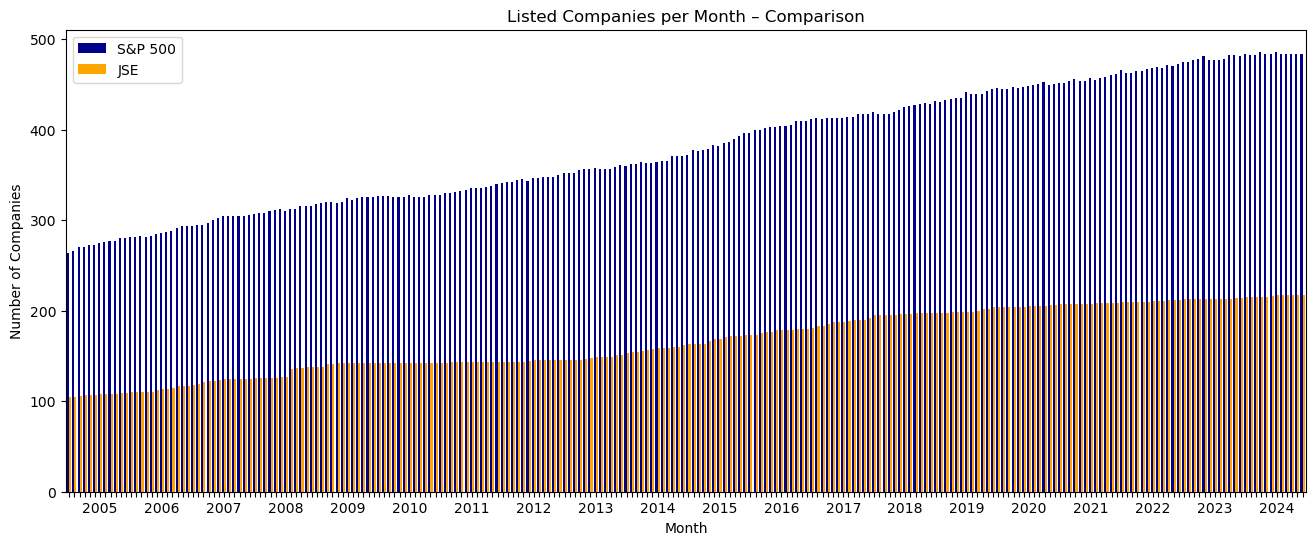

In [65]:
#Visualisierung der vorhandenen Unternehmen im Vergleich über den Zeitverlauf

vergleich_anzahl_unternehmen = pd.DataFrame({
    'S&P 500': anzahl_gelistet_sp500,
    'JSE': anzahl_gelistet_JSE
})

fig, ax = plt.subplots(figsize=(16, 6))
vergleich_anzahl_unternehmen.plot(kind='bar', ax=ax, width=0.8, color= ['darkblue','orange'])

# Nur Dezember-Monate anzeigen
xmonate = vergleich_anzahl_unternehmen.index
xmonatelabels = [dt.strftime('%Y') if dt.month == 12 else '' for dt in xmonate]
ax.set_xticks(range(len(xmonate)))
ax.set_xticklabels(xmonatelabels, rotation=0)

ax.set_title('Listed Companies per Month – Comparison')
ax.set_ylabel('Number of Companies')
ax.set_xlabel('Month')
plt.show()

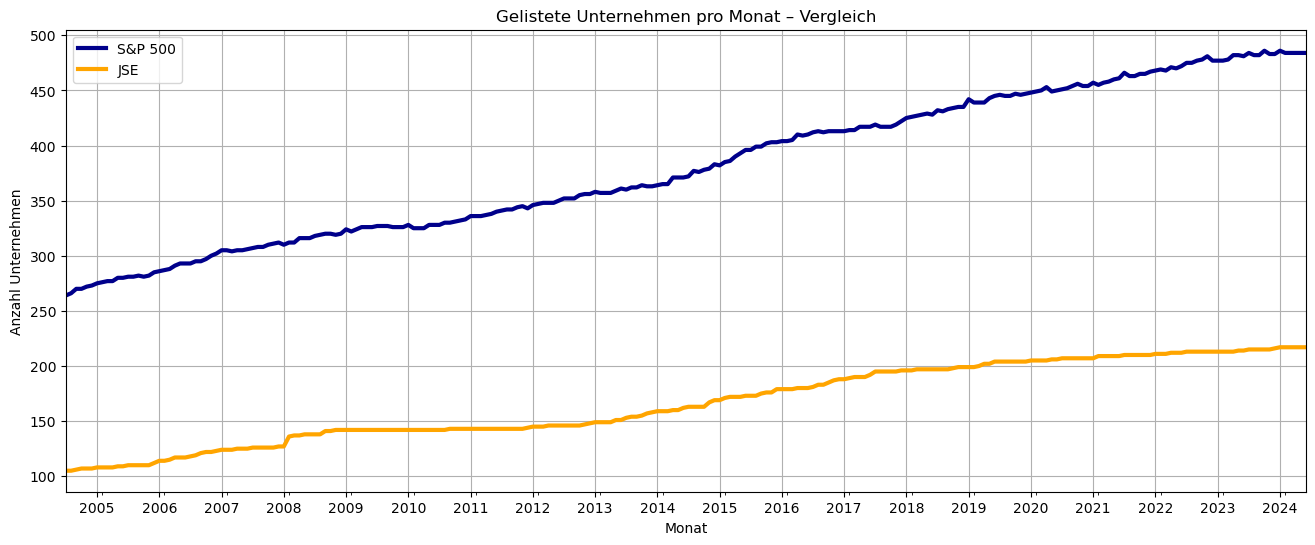

In [66]:
fig, ax = plt.subplots(figsize=(16, 6))
vergleich_anzahl_unternehmen.plot(kind='line', ax=ax, linewidth = 3, color= ['darkblue','orange']  )

#Nur Dezember-Monate anzeigen
xmonate = vergleich_anzahl_unternehmen.index
xtick_positions = [dt for dt in xmonate if dt.month == 12]
xtick_labels = [dt.strftime('%Y') for dt in xtick_positions]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, rotation=0)

ax.set_title('Gelistete Unternehmen pro Monat – Vergleich')
ax.set_ylabel('Anzahl Unternehmen')
ax.set_xlabel('Monat')
ax.grid(True)
plt.show()

In [67]:
#Ermittlung, in welchen Jahren gewisse Ticker zum letzten mal gelistet waren

letztes_datum_sp500 = df_sp500Final.apply(lambda s: s.dropna().last_valid_index(), axis=0)
letztes_jahr_sp500 = letztes_datum_sp500.dropna().apply(lambda x: x.year)
letztes_jahr_sp500 = letztes_jahr_sp500[letztes_jahr_sp500 < 2025]
letztes_jahr_sp500.info

<bound method Series.info of AAL     2024
AAP     2023
AIV     2020
ALK     2023
AMG     2019
        ... 
WHR     2024
WU      2021
XRAY    2024
XRX     2021
ZION    2024
Length: 114, dtype: int64>

In [68]:
#Haben wir nur "Survivor" im Datensatz? Analyse S&P 500 für die Ermittlung von Survivorship Bias

#Letztes Datum mit gültigem Kurswert
letztes_datum_sp500 = df_sp500Final.apply(lambda s: s.dropna().last_valid_index(), axis=0)
letztes_jahr_sp500 = letztes_datum_sp500.dropna().apply(lambda x: x.year)
letztes_jahr_sp500 = letztes_jahr_sp500[letztes_jahr_sp500 < 2025]

#Zähle, wie viele Firmen im jeweiligen Jahr "verschwunden" sind
abgang_pro_jahr_sp500 = letztes_jahr_sp500.value_counts().sort_index()
summe_abgang_sp500 = abgang_pro_jahr_sp500.sum()

print(abgang_pro_jahr_sp500)
print("Summe abgegangener Unternehmen: " + str(summe_abgang_sp500))

2006     2
2007     1
2008    13
2009     4
2010     4
2011     1
2012     3
2013     3
2014     3
2015     4
2016     6
2017     9
2018     4
2019    11
2020     8
2021    11
2022     5
2023     9
2024    13
Name: count, dtype: int64
Summe abgegangener Unternehmen: 114


In [69]:
#Haben wir nur "Survivor" im Datensatz? Analyse JSE bezüglich Survivorship-Bias

#Letztes Datum mit gültigem Kurswert
letztes_datum_JSE = df_JSEFinal.apply(lambda s: s.dropna().last_valid_index(), axis=0)
letztes_jahr_JSE = letztes_datum_JSE.dropna().apply(lambda x: x.year)
letztes_jahr_JSE = letztes_jahr_JSE[letztes_jahr_JSE < 2025]

#Zähle, wie viele Firmen im jeweiligen Jahr "verschwunden" sind
abgang_pro_jahr_JSE = letztes_jahr_JSE.value_counts().sort_index()
summe_abgang_JSE = abgang_pro_jahr_JSE.sum()

print(abgang_pro_jahr_JSE)
print("Summe abgegangener Unternehmen: " + str(summe_abgang_JSE))

Series([], Name: count, dtype: int64)
Summe abgegangener Unternehmen: 0


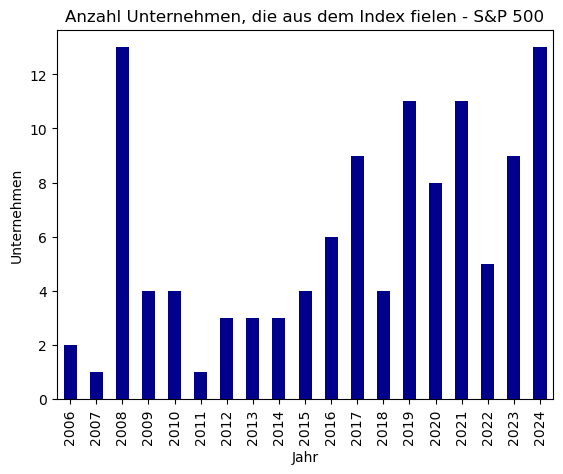

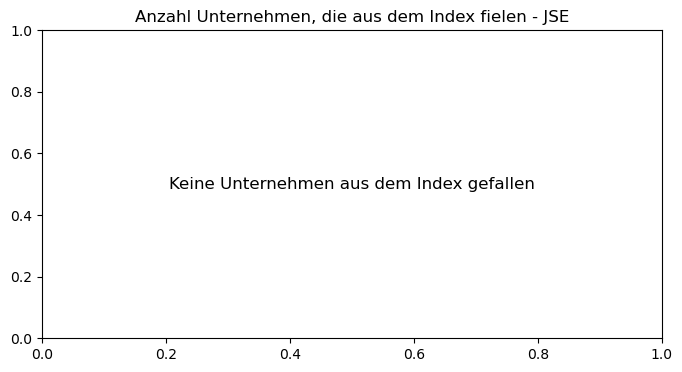

In [70]:
#Visualisierung S&P 500
abgang_pro_jahr_sp500.plot(kind='bar', title='Anzahl Unternehmen, die aus dem Index fielen - S&P 500', color = 'darkblue')
plt.xlabel('Jahr')
plt.ylabel('Unternehmen')

#Visualisierung JSE
fig, ax = plt.subplots(figsize=(8, 4))
ax.text(0.5, 0.5, 'Keine Unternehmen aus dem Index gefallen', ha='center', va='center', fontsize=12)
plt.title('Anzahl Unternehmen, die aus dem Index fielen - JSE')

plt.show()

Nach jetzigem Datenbank-Stand bekommen wir beim JSE eine starke Survivorship-Bias, da nur Unternehmen vorhanden sind, die bis zum heutigen Datum nicht aus der Börse rausgefallen sind. Die tatsächliche Realtität sieht allerdings anders aus, per Recherche kann man schnell nachvollziehen, das beim JSE einige Unternehmen aus der Börse gefallen sind - u.a. durch Insolvenzen oder durch Übernahmen anderer Unternehmen. Auf Yahoo Finance und Google Finance ließen sich leider keine Daten zu delisteten Unternehmen finden. Der Umstand ist zu berücksichtigen in der Bewertung der Ergebnisse. Zur Validierung der Ergebnisse wird ein zweiter S&P500-Bestand aus dem ursprünglichen hier ausgewiesenen erzeugt, der in etwa die gleiche Größe hat wie der JSE-Bestand. In diesem wird ebenso eine Survivorship-Bias eingebaut, indem delistete Unternehmen von vorneherein nicht aufgenommen werden.

In [71]:
#Tickerinfos 
sptickerInfos_df = pd.read_csv("TickerInfos_SP500.csv", sep=",")
sptickerInfos_df.info

<bound method DataFrame.info of       Unnamed: 0 Ticker                                        Name Währung  \
0              0      A                  Agilent Technologies, Inc.     USD   
1              1   AABA                                         NaN     NaN   
2              2    AAL                American Airlines Group Inc.     USD   
3              3    AAL                American Airlines Group Inc.     USD   
4              4  AAMRQ                                         NaN     NaN   
...          ...    ...                                         ...     ...   
1219        1219    YUM                           Yum! Brands, Inc.     USD   
1220        1220    ZBH                Zimmer Biomet Holdings, Inc.     USD   
1221        1221   ZBRA              Zebra Technologies Corporation     USD   
1222        1222   ZION  Zions Bancorporation, National Association     USD   
1223        1223    ZTS                                 Zoetis Inc.     USD   

     Börse         

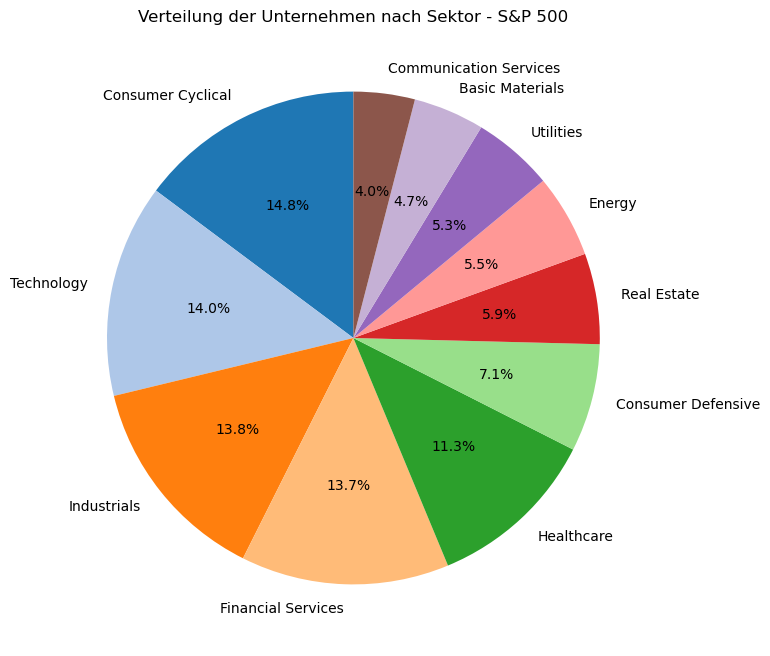

In [72]:
ticker_mit_Kursen_liste_sp500 = df_sp500Final.columns.tolist()
sptickerInfos_df_gefiltert = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_mit_Kursen_liste_sp500)]

sektor_counts = sptickerInfos_df_gefiltert['Sektor'].value_counts()
sektor_prozent = sektor_counts / sektor_counts.sum() * 100

farben = sb.color_palette("tab20", n_colors=11)
plt.figure(figsize=(8, 8))
plt.pie(sektor_prozent, labels=sektor_prozent.index, autopct='%1.1f%%', startangle=90, colors=farben)
plt.title('Verteilung der Unternehmen nach Sektor - S&P 500')
plt.show()

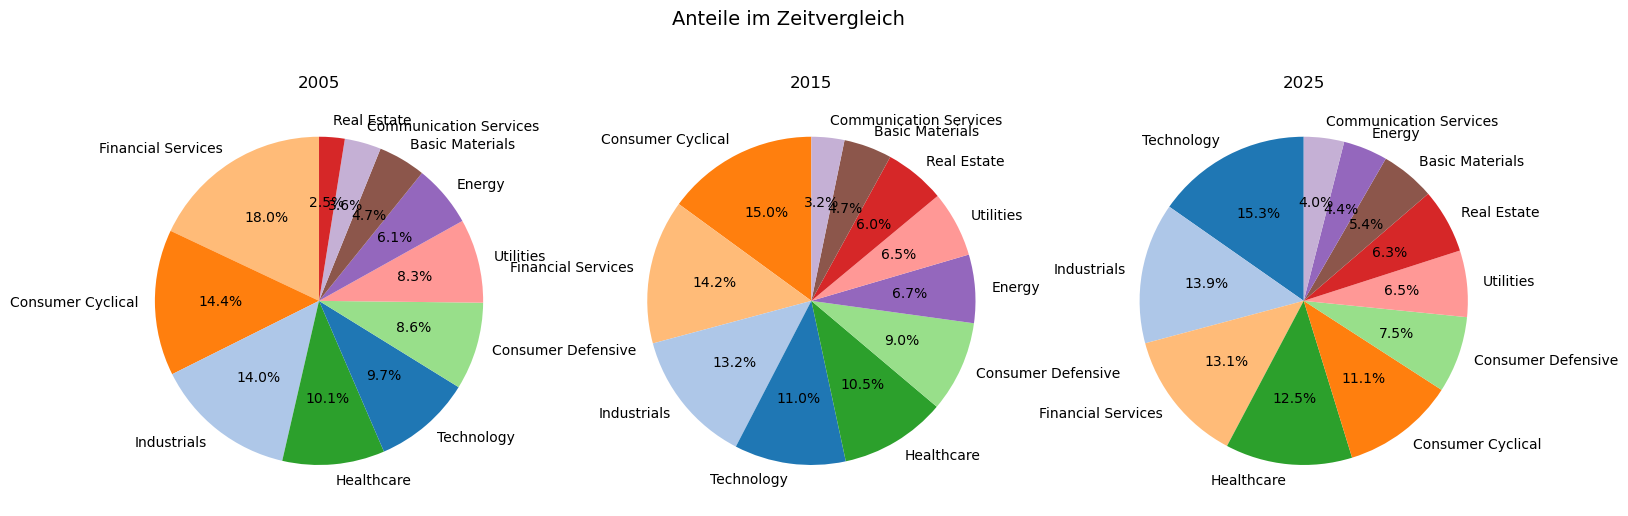

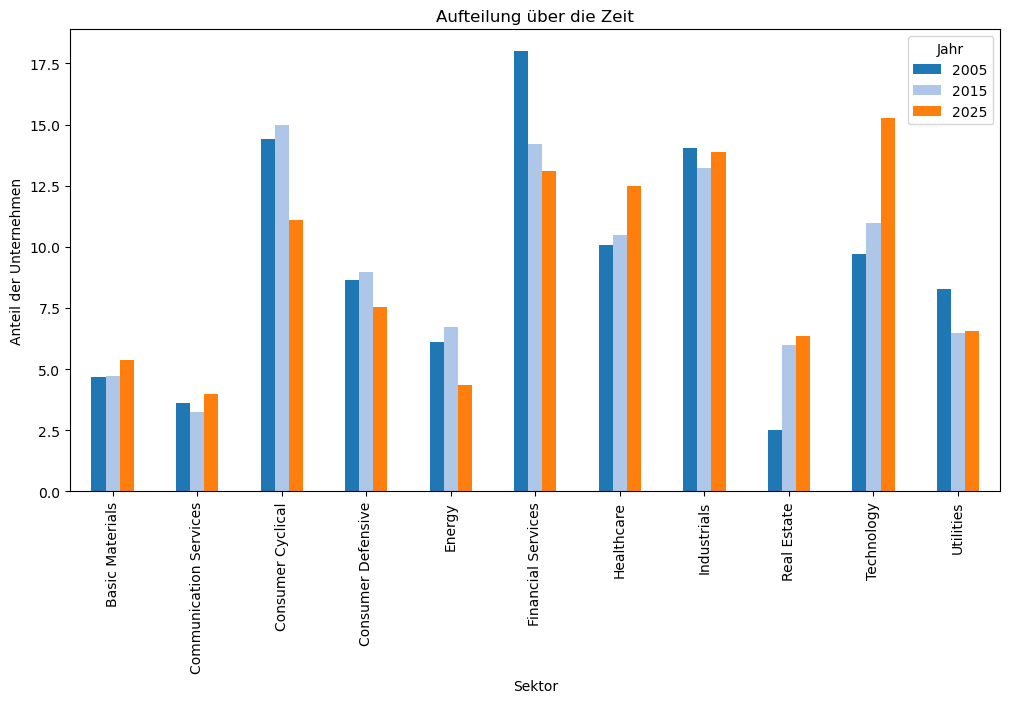

In [73]:
#Nähere Analyse der Sekorentwicklung anhand Aufsplittung zu drei Zeitpunkten

#2005
ticker_2005 = df_sp500Final.loc['2005'].dropna(axis=1, how='all').columns
sptickerInfos_df_gefiltert_2005 = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_2005)]
sektor_counts_2005 = sptickerInfos_df_gefiltert_2005['Sektor'].value_counts()
sektor_prozent_2005 = sektor_counts_2005 / sektor_counts_2005.sum() * 100

#2015
ticker_2015 = df_sp500Final.loc['2015'].dropna(axis=1, how='all').columns
sptickerInfos_df_gefiltert_2015 = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_2015)]
sektor_counts_2015 = sptickerInfos_df_gefiltert_2015['Sektor'].value_counts()
sektor_prozent_2015 = sektor_counts_2015 / sektor_counts_2015.sum() * 100

#2025
ticker_2025 = df_sp500Final.loc['2025'].dropna(axis=1, how='all').columns
sptickerInfos_df_gefiltert_2025 = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_2025)]
sektor_counts_2025 = sptickerInfos_df_gefiltert_2025['Sektor'].value_counts()
sektor_prozent_2025 = sektor_counts_2025 / sektor_counts_2025.sum() * 100

#Zuordnung Farben zu Sektoren für bessere Übersicht
farben_zugeordnet = {
    'Technology': farben[0],
    'Industrials': farben[1],
    'Consumer Cyclical': farben[2],
    'Financial Services': farben[3],
    'Healthcare': farben[4],
    'Consumer Defensive': farben[5],
    'Real Estate': farben[6],
    'Utilities': farben[7],
    'Energy': farben[8],
    'Communication Services': farben[9],
    'Basic Materials': farben[10]
}

farben_2005 = [farben_zugeordnet[sektor] for sektor in sektor_prozent_2005.index]
farben_2015 = [farben_zugeordnet[sektor] for sektor in sektor_prozent_2015.index]
farben_2025 = [farben_zugeordnet[sektor] for sektor in sektor_prozent_2025.index]

#Plotting Kuchendiagramm
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(sektor_prozent_2005, labels=sektor_prozent_2005.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2005)
axes[0].set_title('2005')

axes[1].pie(sektor_prozent_2015, labels=sektor_prozent_2015.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2015)
axes[1].set_title('2015')

axes[2].pie(sektor_prozent_2025, labels=sektor_prozent_2025.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2025)
axes[2].set_title('2025')

plt.suptitle('Anteile im Zeitvergleich', fontsize=14)
plt.show()


#Plotting Vergleich einzelner Sektoren in Balken
vergleich = pd.DataFrame({
    '2005': sektor_prozent_2005,
    '2015': sektor_prozent_2015,
    '2025': sektor_prozent_2025
})

vergleich.plot(kind='bar', figsize=(12, 6), color = farben)
plt.ylabel('Anteil der Unternehmen')
plt.title('Aufteilung über die Zeit')
plt.legend(title='Jahr')
plt.show()

In [74]:
tickerInfos_df = Tickerinfos_JSE.copy()
tickerInfos_df.info

<bound method DataFrame.info of      Unnamed: 0  Ticker                              Name Währung Börse  \
0             0  4SI.JO           4Sight Holdings Limited     ZAc   JNB   
1             1  ABG.JO                Absa Group Limited     ZAc   JNB   
2             2  APF.JO  Accelerate Property Fund Limited     ZAc   JNB   
3             3  ACS.JO                    Acsion Limited     ZAc   JNB   
4             4  AIP.JO    Adcock Ingram Holdings Limited     ZAc   JNB   
..          ...     ...                               ...     ...   ...   
379         379  VLE.JO                               NaN     NaN   NaN   
380         380  WEA.JO                 WG Wearne Limited     NaN   YHD   
381         381  WKF.JO                               NaN     NaN   NaN   
382         382  ZCL.JO                               NaN     NaN   NaN   
383         383  IOC.JO                      iOCO Limited     ZAc   JNB   

                 Sektor                                   Branche  

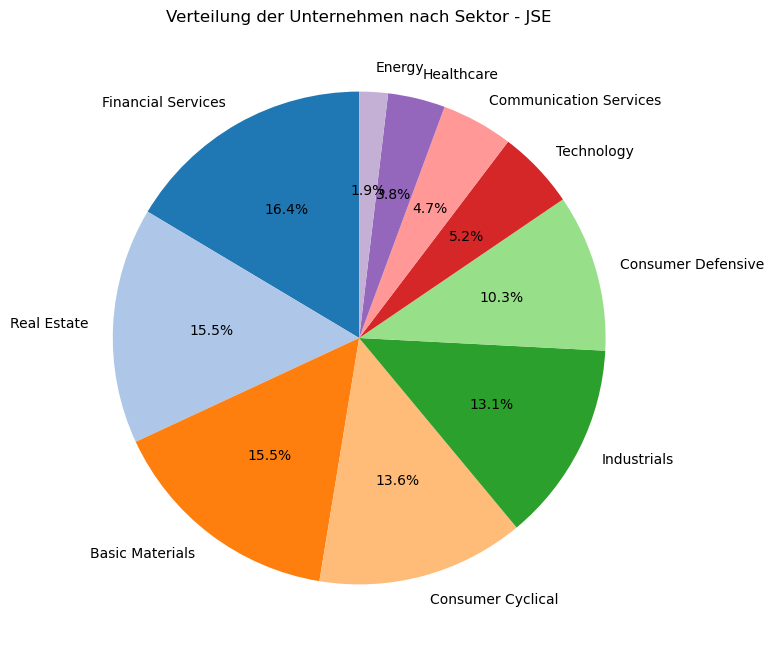

In [75]:
ticker_mit_Kursen_liste_JSE = df_JSEFinal.columns.tolist()
JSEtickerInfos_df_gefiltert = tickerInfos_df[tickerInfos_df['Ticker'].isin(ticker_mit_Kursen_liste_JSE)]
JSEtickerInfos_df_gefiltert = JSEtickerInfos_df_gefiltert.replace("", "N/A")

JSE_sektor_counts = JSEtickerInfos_df_gefiltert['Sektor'].value_counts()
JSE_sektor_prozent = JSE_sektor_counts / JSE_sektor_counts.sum() * 100

farben = sb.color_palette("tab20", n_colors=13)
plt.figure(figsize=(8, 8))
plt.pie(JSE_sektor_prozent, labels=JSE_sektor_prozent.index, autopct='%1.1f%%', startangle=90, colors=farben)
plt.title('Verteilung der Unternehmen nach Sektor - JSE')
plt.show()

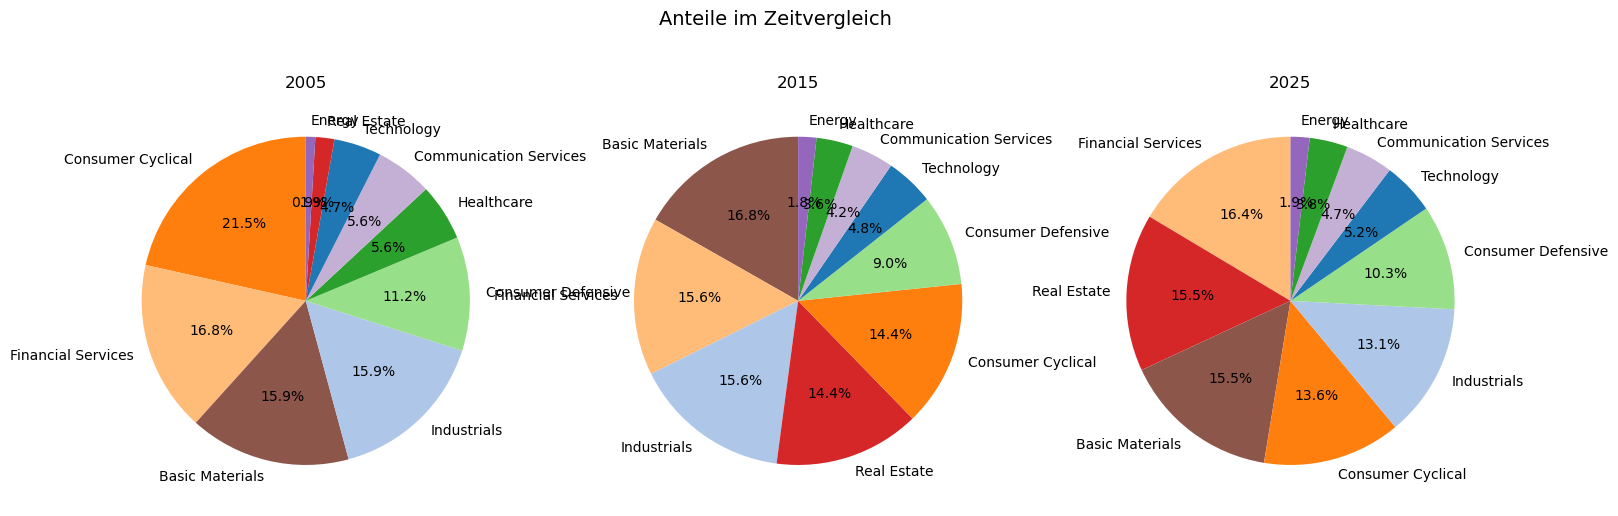

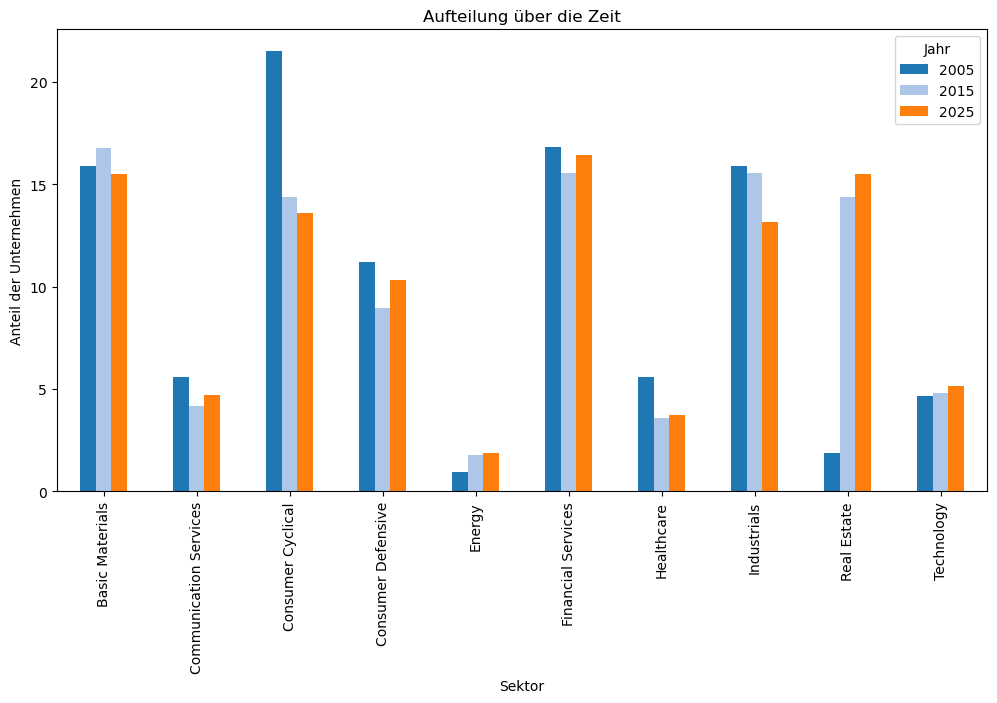

In [76]:
#Nähere Analyse der Sekorentwicklung anhand Aufsplittung zu drei Zeitpunkten

#2005
ticker_2005 = df_JSEFinal.loc['2005'].dropna(axis=1, how='all').columns
JSEtickerInfos_df_gefiltert_2005 = tickerInfos_df[tickerInfos_df['Ticker'].isin(ticker_2005)]
JSEtickerInfos_df_gefiltert_2005 = JSEtickerInfos_df_gefiltert_2005.replace("", "N/A")
JSE_sektor_counts_2005 = JSEtickerInfos_df_gefiltert_2005['Sektor'].value_counts()
JSE_sektor_prozent_2005 = JSE_sektor_counts_2005 / JSE_sektor_counts_2005.sum() * 100

#2015
ticker_2015 = df_JSEFinal.loc['2015'].dropna(axis=1, how='all').columns
JSEtickerInfos_df_gefiltert_2015 = tickerInfos_df[tickerInfos_df['Ticker'].isin(ticker_2015)]
JSEtickerInfos_df_gefiltert_2015 = JSEtickerInfos_df_gefiltert_2015.replace("", "N/A")
JSE_sektor_counts_2015 = JSEtickerInfos_df_gefiltert_2015['Sektor'].value_counts()
JSE_sektor_prozent_2015 = JSE_sektor_counts_2015 / JSE_sektor_counts_2015.sum() * 100

#2025
ticker_2025 = df_JSEFinal.loc['2025'].dropna(axis=1, how='all').columns
JSEtickerInfos_df_gefiltert_2025 = tickerInfos_df[tickerInfos_df['Ticker'].isin(ticker_2025)]
JSEtickerInfos_df_gefiltert_2025 = JSEtickerInfos_df_gefiltert_2025.replace("", "N/A")
JSE_sektor_counts_2025 = JSEtickerInfos_df_gefiltert_2025['Sektor'].value_counts()
JSE_sektor_prozent_2025 = JSE_sektor_counts_2025 / JSE_sektor_counts_2025.sum() * 100

#Zuordnung Farben zu Sektoren für bessere Übersicht
farben_zugeordnet = {
    'Technology': farben[0],
    'Industrials': farben[1],
    'Consumer Cyclical': farben[2],
    'Financial Services': farben[3],
    'Healthcare': farben[4],
    'Consumer Defensive': farben[5],
    'Real Estate': farben[6],
    'Utilities': farben[7],
    'Energy': farben[8],
    'Communication Services': farben[9],
    'Basic Materials': farben[10],
    'N/A': farben[11]
}

farben_2005 = [farben_zugeordnet[sektor] for sektor in JSE_sektor_prozent_2005.index]
farben_2015 = [farben_zugeordnet[sektor] for sektor in JSE_sektor_prozent_2015.index]
farben_2025 = [farben_zugeordnet[sektor] for sektor in JSE_sektor_prozent_2025.index]

#Plotting Kuchendiagramm
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(JSE_sektor_prozent_2005, labels=JSE_sektor_prozent_2005.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2005)
axes[0].set_title('2005')

axes[1].pie(JSE_sektor_prozent_2015, labels=JSE_sektor_prozent_2015.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2015)
axes[1].set_title('2015')

axes[2].pie(JSE_sektor_prozent_2025, labels=JSE_sektor_prozent_2025.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2025)
axes[2].set_title('2025')

plt.suptitle('Anteile im Zeitvergleich', fontsize=14)
plt.show()


#Plotting Vergleich einzelner Sektoren in Balken
vergleich = pd.DataFrame({
    '2005': JSE_sektor_prozent_2005,
    '2015': JSE_sektor_prozent_2015,
    '2025': JSE_sektor_prozent_2025
})

vergleich.plot(kind='bar', figsize=(12, 6), color = farben)
plt.ylabel('Anteil der Unternehmen')
plt.title('Aufteilung über die Zeit')
plt.legend(title='Jahr')
plt.show()

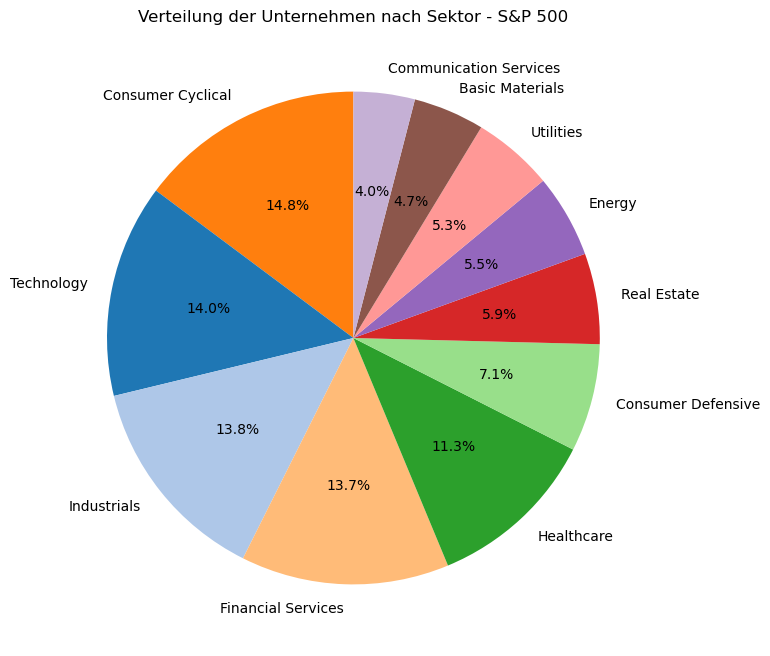

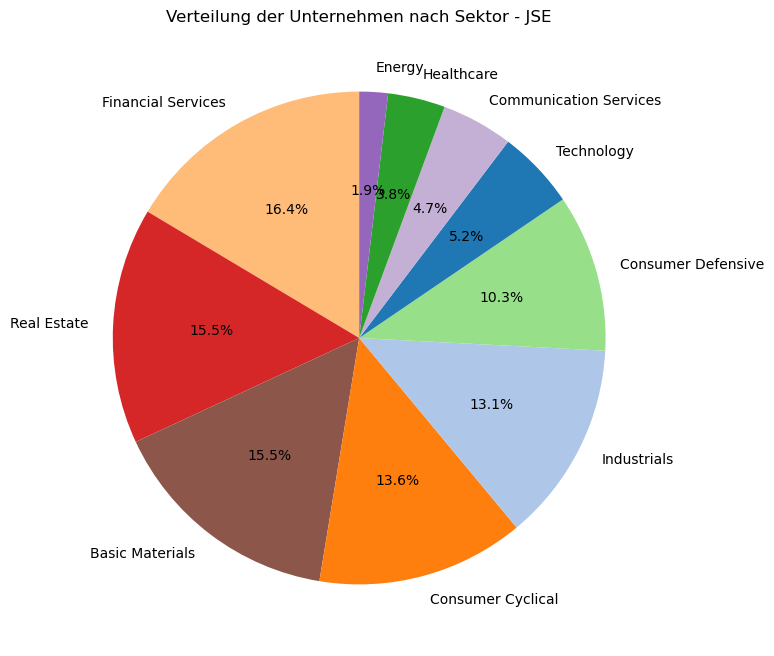

In [77]:
#Zuordnung Farben zu Sektoren für bessere Übersicht
farben = sb.color_palette("tab20", n_colors=12)

farben_zugeordnet = {
    'Technology': farben[0],
    'Industrials': farben[1],
    'Consumer Cyclical': farben[2],
    'Financial Services': farben[3],
    'Healthcare': farben[4],
    'Consumer Defensive': farben[5],
    'Real Estate': farben[6],
    'Utilities': farben[7],
    'Energy': farben[8],
    'Communication Services': farben[9],
    'Basic Materials': farben[10],
    'N/A': farben[11]
}

farben_vergleich_sp500 = [farben_zugeordnet[sektor] for sektor in sektor_prozent.index]
farben_vergleich_JSE = [farben_zugeordnet[sektor] for sektor in JSE_sektor_prozent.index]

plt.figure(figsize=(8, 8))
plt.pie(sektor_prozent, labels=sektor_prozent.index, autopct='%1.1f%%', startangle=90, colors=farben_vergleich_sp500)
plt.title('Verteilung der Unternehmen nach Sektor - S&P 500')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(JSE_sektor_prozent, labels=JSE_sektor_prozent.index, autopct='%1.1f%%', startangle=90, colors=farben_vergleich_JSE)
plt.title('Verteilung der Unternehmen nach Sektor - JSE')
plt.show()

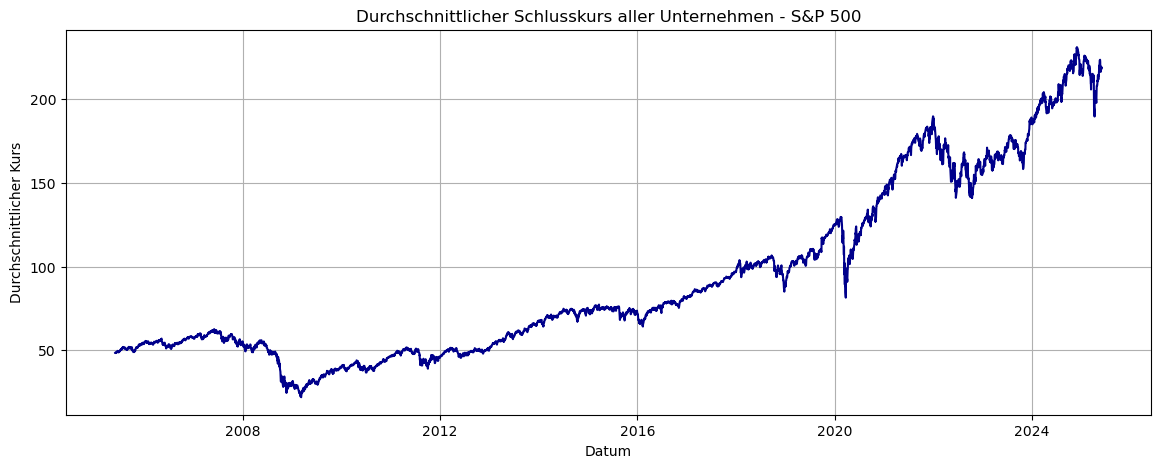

In [78]:
#Durchschnittlichen Kursverlauf der gesammelten Daten Darstellen - S&P 500

#Komma durch Punkt ersetzen und zu Zahlen konvertieren
df_sp500_bereinigt = df_sp500Final

df_sp500_bereinigt = (
    df_sp500_bereinigt
    .astype(str)
    .replace(",", ".", regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

df_sp500_bereinigt["Durchschnitt"] = df_sp500_bereinigt.mean(axis=1, skipna=True)

# Plotten
plt.figure(figsize=(14, 5))
plt.plot(df_sp500_bereinigt.index, df_sp500_bereinigt["Durchschnitt"], color='darkblue', linewidth=1.5)
plt.title("Durchschnittlicher Schlusskurs aller Unternehmen - S&P 500")
plt.xlabel("Datum")
plt.ylabel("Durchschnittlicher Kurs")
plt.grid(True)
plt.show()

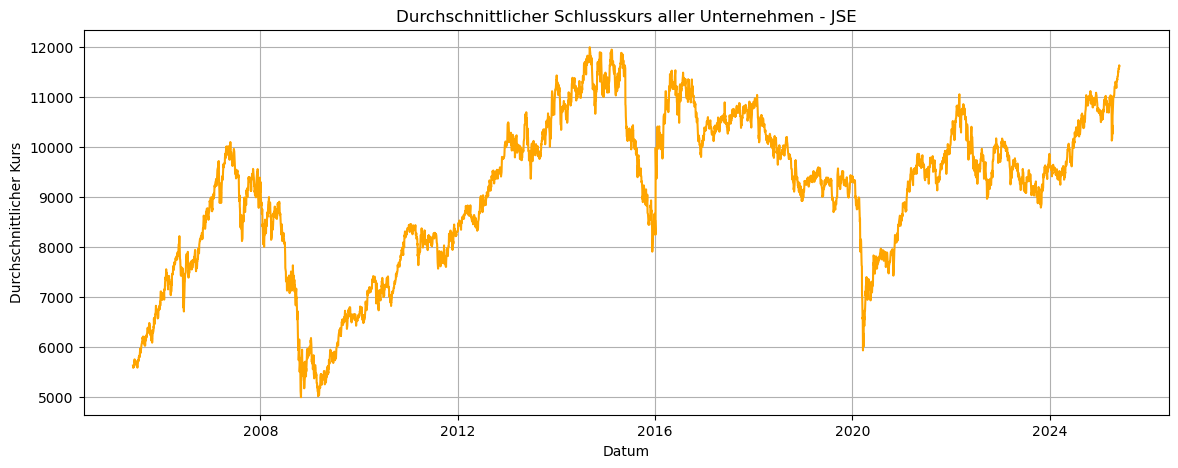

In [79]:
#Durchschnittlichen Kursverlauf der gesammelten Daten Darstellen - JSE

#Komma durch Punkt ersetzen und zu Zahlen konvertieren
df_JSE_bereinigt = df_JSEFinal.copy()

df_JSE_bereinigt = (
    df_JSE_bereinigt
    .astype(str)
    .replace(",", ".", regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

#Problematischer Ticker, manche Kurse darin scheinen falsch ausgewiesen zu sein
#df_JSE_bereinigt = df_JSE_bereinigt.drop(columns=["RNG.JO"])

df_JSE_bereinigt["Durchschnitt"] = df_JSE_bereinigt.mean(axis=1, skipna=True)

# Plotten
plt.figure(figsize=(14, 5))
plt.plot(df_JSE_bereinigt.index, df_JSE_bereinigt["Durchschnitt"], color='orange', linewidth=1.5)
plt.title("Durchschnittlicher Schlusskurs aller Unternehmen - JSE")
plt.xlabel("Datum")
plt.ylabel("Durchschnittlicher Kurs")
plt.grid(True)
plt.show()

## Erzeugen verkleinerter S&P 500 Bestand

In [80]:
df_sp500Final.info

<bound method DataFrame.info of                      A  AAL  AAP        AAPL        ABBV        ABNB  \
Date                                                                   
2005-06-01   17.296137  NaN  NaN    1.439286         NaN         NaN   
2005-06-02   17.303289  NaN  NaN        1.43         NaN         NaN   
2005-06-03     17.2103  NaN  NaN    1.365714         NaN         NaN   
2005-06-06   17.539343  NaN  NaN    1.354286         NaN         NaN   
2005-06-07   17.324751  NaN  NaN       1.305         NaN         NaN   
...                ...  ...  ...         ...         ...         ...   
2025-05-23  108.529999  NaN  NaN  195.270004  183.259995  126.720001   
2025-05-27  111.260002  NaN  NaN  200.210007  185.720001  129.399994   
2025-05-28  110.879997  NaN  NaN  200.419998  183.089996  128.669998   
2025-05-29  113.279999  NaN  NaN  199.949997  185.619995  128.360001   
2025-05-30  111.919998  NaN  NaN  200.850006  186.110001       129.0   

                   ABT       AC

In [81]:
#Identifzieren der Unternehmen, die aus dem Index fallen
letztes_datum_sp500 = df_sp500Final.apply(lambda s: s.dropna().last_valid_index(), axis=0)
letztes_jahr_sp500 = letztes_datum_sp500.dropna().apply(lambda x: x.year)
letztes_jahr_sp500 = letztes_jahr_sp500[letztes_jahr_sp500 < 2025]
letztes_jahr_sp500

AAL     2024
AAP     2023
AIV     2020
ALK     2023
AMG     2019
        ... 
WHR     2024
WU      2021
XRAY    2024
XRX     2021
ZION    2024
Length: 114, dtype: int64

In [82]:
#Liste der Unternehmen, die rausgefallen sind
abgangs_firmen = letztes_jahr_sp500.index

#DataFrame ohne diese Firmen
df_sp500_only_survivor = df_sp500Final.drop(columns=abgangs_firmen)

print("Alte Form:", df_sp500Final.shape)
print("Neue Form:", df_sp500_only_survivor.shape)

Alte Form: (5032, 598)
Neue Form: (5032, 484)


In [83]:
sptickerInfos_df.head()

,Unnamed: 0,Ticker,Name,Währung,Börse,Sektor,Branche
0,0,A,"Agilent Technologies, Inc.",USD,NYQ,Healthcare,Diagnostics & Research
1,1,AABA,NaN,NaN,NaN,NaN,NaN
2,2,AAL,American Airlines Group Inc.,USD,NMS,Industrials,Airlines
3,3,AAL,American Airlines Group Inc.,USD,NMS,Industrials,Airlines
4,4,AAMRQ,NaN,NaN,YHD,NaN,NaN


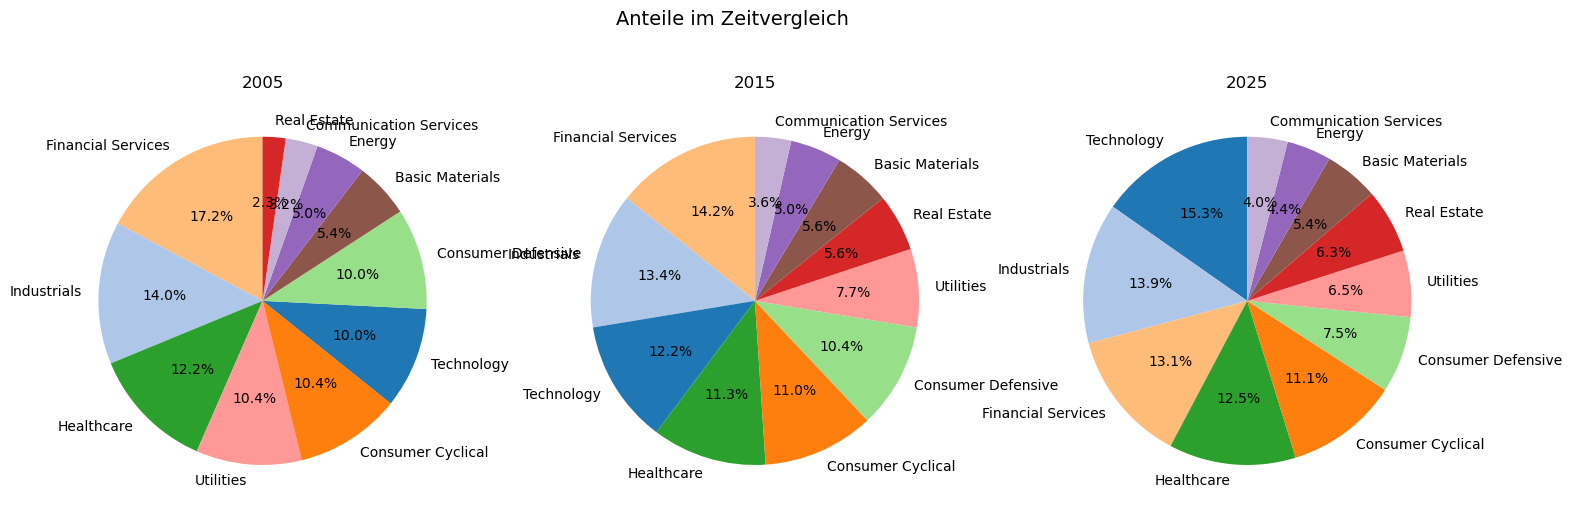

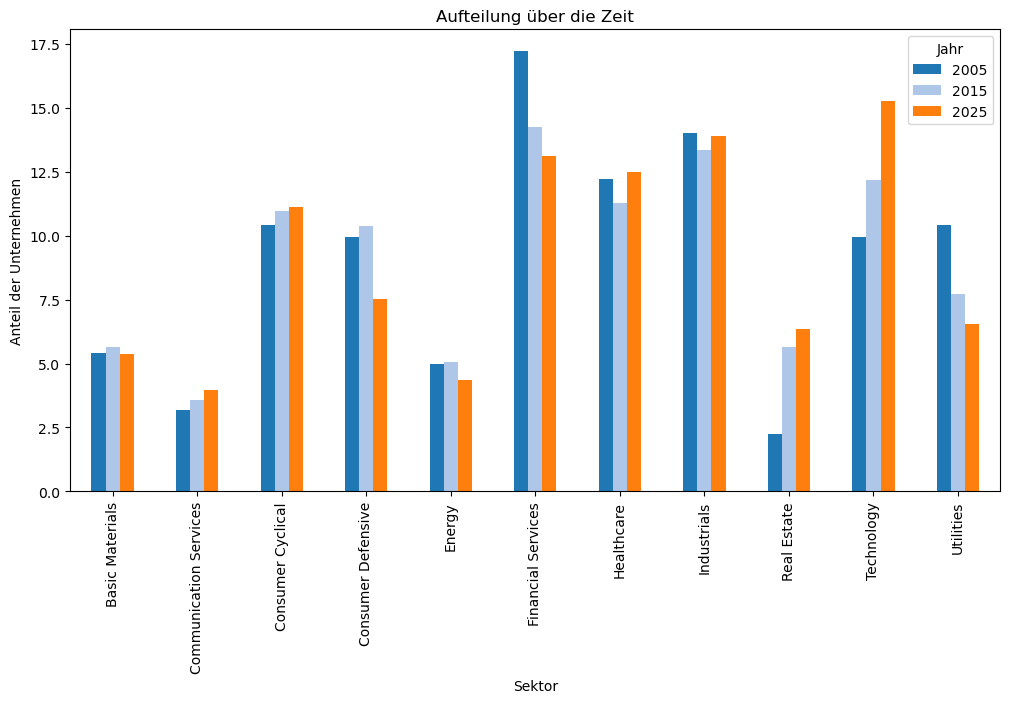

In [84]:
#Nähere Analyse der Sekorentwicklung anhand Aufsplittung zu drei Zeitpunkten

#2005
ticker_2005 = df_sp500_only_survivor.loc['2005'].dropna(axis=1, how='all').columns
sptickerInfos_df_gefiltert_2005 = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_2005)]
sektor_counts_2005 = sptickerInfos_df_gefiltert_2005['Sektor'].value_counts()
sektor_prozent_2005 = sektor_counts_2005 / sektor_counts_2005.sum() * 100

#2015
ticker_2015 = df_sp500_only_survivor.loc['2015'].dropna(axis=1, how='all').columns
sptickerInfos_df_gefiltert_2015 = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_2015)]
sektor_counts_2015 = sptickerInfos_df_gefiltert_2015['Sektor'].value_counts()
sektor_prozent_2015 = sektor_counts_2015 / sektor_counts_2015.sum() * 100

#2025
ticker_2025 = df_sp500_only_survivor.loc['2025'].dropna(axis=1, how='all').columns
sptickerInfos_df_gefiltert_2025 = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_2025)]
sektor_counts_2025 = sptickerInfos_df_gefiltert_2025['Sektor'].value_counts()
sektor_prozent_2025 = sektor_counts_2025 / sektor_counts_2025.sum() * 100

farben = sb.color_palette("tab20", n_colors=11)

#Zuordnung Farben zu Sektoren für bessere Übersicht
farben_zugeordnet = {
    'Technology': farben[0],
    'Industrials': farben[1],
    'Consumer Cyclical': farben[2],
    'Financial Services': farben[3],
    'Healthcare': farben[4],
    'Consumer Defensive': farben[5],
    'Real Estate': farben[6],
    'Utilities': farben[7],
    'Energy': farben[8],
    'Communication Services': farben[9],
    'Basic Materials': farben[10]
}

farben_2005 = [farben_zugeordnet[sektor] for sektor in sektor_prozent_2005.index]
farben_2015 = [farben_zugeordnet[sektor] for sektor in sektor_prozent_2015.index]
farben_2025 = [farben_zugeordnet[sektor] for sektor in sektor_prozent_2025.index]

#Plotting Kuchendiagramm
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(sektor_prozent_2005, labels=sektor_prozent_2005.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2005)
axes[0].set_title('2005')

axes[1].pie(sektor_prozent_2015, labels=sektor_prozent_2015.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2015)
axes[1].set_title('2015')

axes[2].pie(sektor_prozent_2025, labels=sektor_prozent_2025.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2025)
axes[2].set_title('2025')

plt.suptitle('Anteile im Zeitvergleich', fontsize=14)
plt.show()


#Plotting Vergleich einzelner Sektoren in Balken
vergleich = pd.DataFrame({
    '2005': sektor_prozent_2005,
    '2015': sektor_prozent_2015,
    '2025': sektor_prozent_2025
})

vergleich.plot(kind='bar', figsize=(12, 6), color = farben)
plt.ylabel('Anteil der Unternehmen')
plt.title('Aufteilung über die Zeit')
plt.legend(title='Jahr')
plt.show()

In [85]:
df_JSEFinal.info

<bound method DataFrame.info of             4SI.JO   ABG.JO  ACL.JO  ACT.JO       ADH.JO  AEL.JO  \
Date                                                               
2005-06-01     NaN   8240.0  4980.0   130.0   133.701508     NaN   
2005-06-02     NaN   8250.0  4949.0   130.0   131.749695     NaN   
2005-06-03     NaN   8261.0  4949.0   130.0   131.749695     NaN   
2005-06-06     NaN   8290.0  5023.0   130.0   132.725601     NaN   
2005-06-07     NaN   8345.0  4845.0   149.0   131.749695     NaN   
...            ...      ...     ...     ...          ...     ...   
2025-05-26    70.0  16845.0   109.0   160.0  3199.000000  2350.0   
2025-05-27    70.0  16848.0   105.0   160.0  3210.000000  2350.0   
2025-05-28    73.0  17300.0   101.0   174.0  3283.000000  2355.0   
2025-05-29    70.0  17579.0   106.0   166.0  3247.000000  2362.0   
2025-05-30    70.0  17332.0   116.0   160.0  3215.000000  2358.0   

                  AFE.JO  AFH.JO  AFT.JO        AGL.JO  ...  VKE.JO   VOD.JO  \
Dat

In [86]:
#Anzahl der Unternehmen, die in den jeweiligen Monaten gelistet waren (Werte verfügbar, JSE)

anzahl_kurse_jährlich_JSE = df_JSEFinal.resample('Y').count()
anzahl_gelistet_JSE = anzahl_kurse_jährlich_JSE.apply(lambda row: (row > 0).sum(), axis=1)

print(anzahl_gelistet_JSE)

Date
2005-12-31    108
2006-12-31    114
2007-12-31    124
2008-12-31    127
2009-12-31    142
2010-12-31    142
2011-12-31    143
2012-12-31    145
2013-12-31    149
2014-12-31    159
2015-12-31    169
2016-12-31    179
2017-12-31    188
2018-12-31    196
2019-12-31    199
2020-12-31    205
2021-12-31    207
2022-12-31    211
2023-12-31    213
2024-12-31    217
2025-12-31    217
Freq: A-DEC, dtype: int64


In [87]:
#Anzahl der Unternehmen, die in den jeweiligen Jahren gelistet waren (Survivor S&P500)

anzahl_kurse_jährlich_SP = df_sp500_only_survivor.resample('Y').count()
anzahl_gelistet_SP = anzahl_kurse_jährlich_SP.apply(lambda row: (row > 0).sum(), axis=1)

print(anzahl_gelistet_SP)

Date
2005-12-31    218
2006-12-31    227
2007-12-31    240
2008-12-31    255
2009-12-31    268
2010-12-31    272
2011-12-31    282
2012-12-31    293
2013-12-31    303
2014-12-31    311
2015-12-31    325
2016-12-31    345
2017-12-31    364
2018-12-31    378
2019-12-31    402
2020-12-31    414
2021-12-31    428
2022-12-31    447
2023-12-31    465
2024-12-31    484
2025-12-31    484
Freq: A-DEC, dtype: int64


In [88]:
#Index in nur Jahr ändern
anzahl_gelistet_JSE.index = anzahl_gelistet_JSE.index.year

print(anzahl_gelistet_JSE)

Date
2005    108
2006    114
2007    124
2008    127
2009    142
2010    142
2011    143
2012    145
2013    149
2014    159
2015    169
2016    179
2017    188
2018    196
2019    199
2020    205
2021    207
2022    211
2023    213
2024    217
2025    217
dtype: int64


In [89]:
#Index in nur Jahr ändern
anzahl_gelistet_SP.index = anzahl_gelistet_SP.index.year

print(anzahl_gelistet_SP)

Date
2005    218
2006    227
2007    240
2008    255
2009    268
2010    272
2011    282
2012    293
2013    303
2014    311
2015    325
2016    345
2017    364
2018    378
2019    402
2020    414
2021    428
2022    447
2023    465
2024    484
2025    484
dtype: int64


In [90]:
#Zielwert ist die Unternehmensanzahl im JSE
jahre = range(2005, 2026)
anzahl_pro_jahr = {jahr: anzahl_gelistet_JSE[jahr] for jahr in jahre}

auswahl_für_jahr = {}
auswahl_bestehend = set()  # Firmen, die dauerhaft bleiben

#Schleife über alle Jahre 
for jahr in jahre:
    
    #Ticker, die im aktuellen Jahr existieren
    ticker_jahr = set(df_sp500_only_survivor.loc[str(jahr)].dropna(axis=1, how='all').columns)
    info_jahr = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_jahr)]
    
    #Firmen aus Vorjahren, die noch im aktuellen Jahr existieren
    bestehend_jahr = auswahl_bestehend & ticker_jahr
    
    #Anzahl neuer Firmen, die wir zusätzlich hinzufügen müssen, um JSE-Wert zu erreichen
    zielwert_bestand = anzahl_pro_jahr[jahr]
    num_neu = max(0, zielwert_bestand - len(bestehend_jahr))
    
    neue_firmen = set()
    if num_neu > 0:
        #Sektor-Anteile berechnen
        sektor_counts = info_jahr['Sektor'].value_counts()
        sektor_prozent = sektor_counts / sektor_counts.sum()
        ziel_anzahl = (sektor_prozent * num_neu).round().astype(int)
        
        #Neue Firmen pro Sektor auswählen
        for sektor, anzahl in ziel_anzahl.items():
            tickers_sektor = set(info_jahr.loc[info_jahr['Sektor'] == sektor, 'Ticker'])
            candidate_tickers = list(tickers_sektor - bestehend_jahr - neue_firmen)
            if len(candidate_tickers) == 0:
                continue
            n = min(anzahl, len(candidate_tickers))
            add = np.random.choice(candidate_tickers, size=n, replace=False)
            neue_firmen.update(add)
    
    #Firmen für das Jahr= bestehende + neu ausgewählte
    auswahl_aktuell = bestehend_jahr | neue_firmen
    
    #Speichern
    auswahl_für_jahr[jahr] = auswahl_aktuell
    auswahl_bestehend = auswahl_aktuell  #für das nächste Jahr

#Kontrolle: Anzahl Firmen pro Jahr steigt oder bleibt gleich
for jahr in jahre:
    print(jahr, len(auswahl_für_jahr[jahr]))

2005 107
2006 114
2007 122
2008 127
2009 143
2010 143
2011 143
2012 143
2013 149
2014 159
2015 169
2016 178
2017 187
2018 195
2019 199
2020 204
2021 204
2022 210
2023 210
2024 216
2025 216


In [91]:
auswahl_für_jahr

{2005: {'A',
  'AAPL',
  'AES',
  'ALL',
  'AMAT',
  'AMP',
  'AMZN',
  'AON',
  'APA',
  'AZO',
  'BAC',
  'BAX',
  'BIIB',
  'BMY',
  'BSX',
  'C',
  'CI',
  'CINF',
  'CL',
  'CLX',
  'CMCSA',
  'CMI',
  'CNP',
  'COP',
  'CPB',
  'CSCO',
  'CSX',
  'CVS',
  'D',
  'DE',
  'DHI',
  'DHR',
  'DRI',
  'ED',
  'EMN',
  'EQR',
  'ETR',
  'F',
  'FCX',
  'FE',
  'GE',
  'GLW',
  'GS',
  'HAL',
  'HAS',
  'HBAN',
  'HON',
  'HPQ',
  'HSY',
  'HUM',
  'IFF',
  'INTU',
  'JCI',
  'KEY',
  'KLAC',
  'KMB',
  'KO',
  'KR',
  'LMT',
  'LOW',
  'MAS',
  'MCD',
  'MMM',
  'MO',
  'MS',
  'MSI',
  'MTB',
  'MU',
  'NEE',
  'NI',
  'NKE',
  'NOC',
  'NSC',
  'NTRS',
  'NUE',
  'OMC',
  'OXY',
  'PAYX',
  'PCAR',
  'PEG',
  'PEP',
  'PFG',
  'PGR',
  'PH',
  'PHM',
  'PLD',
  'PPG',
  'PPL',
  'PRU',
  'RF',
  'SCHW',
  'SHW',
  'SLB',
  'SRE',
  'STZ',
  'SYK',
  'T',
  'TMO',
  'TPR',
  'TSN',
  'TXN',
  'TXT',
  'UNP',
  'USB',
  'WAT',
  'WFC',
  'ZBH'},
 2006: {'A',
  'AAPL',
  'AES',
  'ALL',

In [92]:
# DataFrame bauen: Jahr als Index, Firmen als String-Liste
df_auswahl = pd.DataFrame({
    "Jahr": list(auswahl_für_jahr.keys()),
    "Ticker": [",".join(sorted(list(ticker_set))) for ticker_set in auswahl_für_jahr.values()]
})

# CSV speichern
df_auswahl.to_csv("auswahl_für_jahr_neu.csv", index=False)

In [93]:
#Kopie des Original-DF mit NaNs
df_sp500_gefiltert = df_sp500Final.copy() * np.nan  
df_sp500_gefiltert.index = df_sp500Final.index

for jahr, tickers in auswahl_für_jahr.items():
    #alle Zeilen, die in dieses Jahr fallen
    ausw_jahr = df_sp500_gefiltert.index.year == jahr
    
    #nur die ausgewählten Ticker für dieses Jahr
    gemeinsame_ticker = list(set(df_sp500_gefiltert.columns) & tickers)
    
    #Werte aus Original übernehmen
    df_sp500_gefiltert.loc[ausw_jahr, gemeinsame_ticker] = df_sp500Final.loc[ausw_jahr, gemeinsame_ticker]
    
#Datumsspalte hinzufügen und kürzen
df_sp500_gefiltert = df_sp500_gefiltert.reset_index().rename(columns={"index": "Date"})
df_sp500_gefiltert.index = pd.to_datetime(df_sp500_gefiltert.index)
df_sp500_gefiltert['Date'] = pd.to_datetime(df_sp500_gefiltert['Date'], errors='coerce')
df_sp500_gefiltert = df_sp500_gefiltert.set_index('Date')
df_sp500_gefiltert = df_sp500_gefiltert.dropna(axis=1, how="all")

In [94]:
df_sp500_gefiltert.info

<bound method DataFrame.info of                      A        AAPL         ABT         ACN         ADI  \
Date                                                                     
2005-06-01   17.296137    1.439286         NaN         NaN         NaN   
2005-06-02   17.303289        1.43         NaN         NaN         NaN   
2005-06-03     17.2103    1.365714         NaN         NaN         NaN   
2005-06-06   17.539343    1.354286         NaN         NaN         NaN   
2005-06-07   17.324751       1.305         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2025-05-23  108.529999  195.270004  131.300003  309.579987  210.470001   
2025-05-27  111.260002  200.210007  132.940002  315.429993  216.889999   
2025-05-28  110.879997  200.419998  132.020004   315.98999  215.619995   
2025-05-29  113.279999  199.949997  132.850006  317.730011      215.75   
2025-05-30  111.919998  200.850006  133.580002  316.820007  213.979996   

     

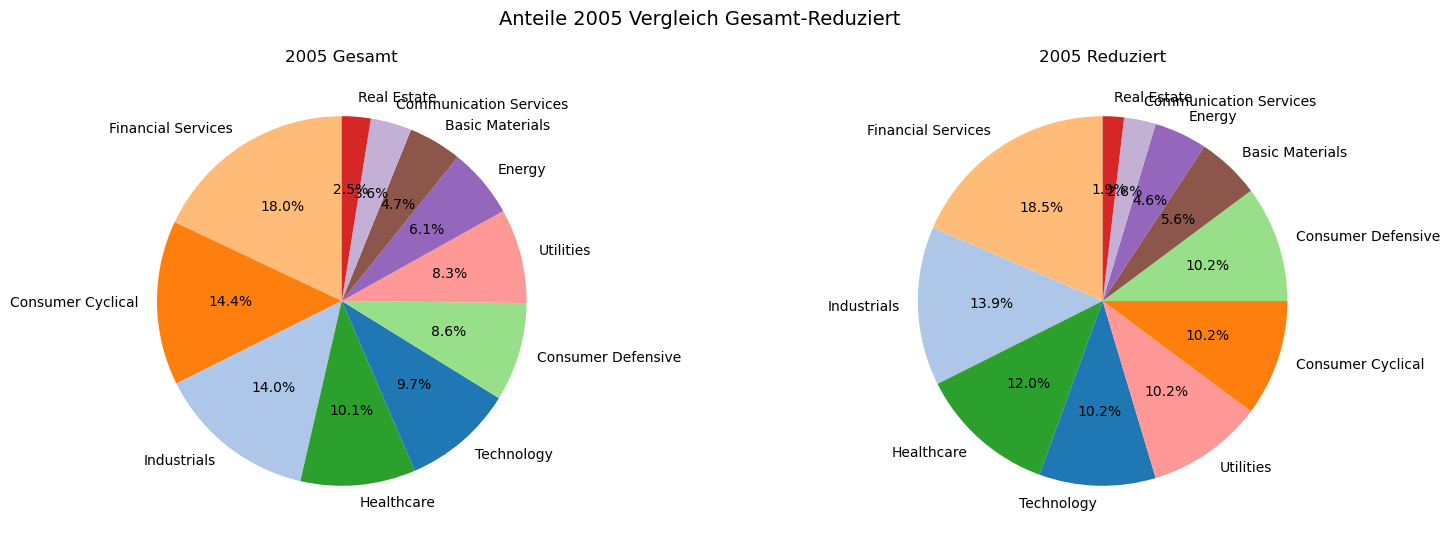

In [95]:
#2005 Gesamt
ticker_2005_gesamt = df_sp500Final.loc['2005'].dropna(axis=1, how='all').columns
sptickerInfos_df_gefiltert_2005_gesamt = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_2005_gesamt)]
sektor_counts_2005_gesamt = sptickerInfos_df_gefiltert_2005_gesamt['Sektor'].value_counts()
sektor_prozent_2005_gesamt = sektor_counts_2005_gesamt / sektor_counts_2005_gesamt.sum() * 100

#2005 Reduziert
ticker_2005_reduziert = df_sp500_gefiltert.loc['2005'].dropna(axis=1, how='all').columns
sptickerInfos_df_gefiltert_2005_reduziert = sptickerInfos_df[sptickerInfos_df['Ticker'].isin(ticker_2005_reduziert)]
sektor_counts_2005_reduziert = sptickerInfos_df_gefiltert_2005_reduziert['Sektor'].value_counts()
sektor_prozent_2005_reduziert = sektor_counts_2005_reduziert / sektor_counts_2005_reduziert.sum() * 100

farben = sb.color_palette("tab20", n_colors=11)

#Zuordnung Farben zu Sektoren für bessere Übersicht
farben_zugeordnet = {
    'Technology': farben[0],
    'Industrials': farben[1],
    'Consumer Cyclical': farben[2],
    'Financial Services': farben[3],
    'Healthcare': farben[4],
    'Consumer Defensive': farben[5],
    'Real Estate': farben[6],
    'Utilities': farben[7],
    'Energy': farben[8],
    'Communication Services': farben[9],
    'Basic Materials': farben[10]
}

farben_2005_gesamt = [farben_zugeordnet[sektor] for sektor in sektor_prozent_2005_gesamt.index]
farben_2005_reduziert = [farben_zugeordnet[sektor] for sektor in sektor_prozent_2005_reduziert.index]

#Plotting Kuchendiagramm
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].pie(sektor_prozent_2005_gesamt, labels=sektor_prozent_2005_gesamt.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2005_gesamt)
axes[0].set_title('2005 Gesamt')

axes[1].pie(sektor_prozent_2005_reduziert, labels=sektor_prozent_2005_reduziert.index,
            autopct='%1.1f%%', startangle=90, colors=farben_2005_reduziert)
axes[1].set_title('2005 Reduziert')

plt.suptitle('Anteile 2005 Vergleich Gesamt-Reduziert', fontsize=14)
plt.show()

In [96]:
#CSV speichern
df_sp500_gefiltert.to_csv("sp500_gefiltert_neuneu.csv", index=True)